# Global Power Plant Database

# Project Description
    
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

## Key attributes of the database

**The database includes the following indicators:**

    `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
	`country_long` (text): longer form of the country designation
	`name` (text): name or title of the power plant, generally in Romanized form
	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
	`capacity_mw` (number): electrical generating capacity in megawatts
	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
	`primary_fuel` (text): energy source used in primary electricity generation or export
	`other_fuel1` (text): energy source used in electricity generation or export
	`other_fuel2` (text): energy source used in electricity generation or export
	`other_fuel3` (text): energy source used in electricity generation or export
	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
	`owner` (text): majority shareholder of the power plant, generally in Romanized form
	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
	`url` (text): web document corresponding to the `source` field
	`geolocation_source` (text): attribution for geolocation information
	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
	`year_of_capacity_data` (number): year the capacity information was reported
	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
	`generation_data_source` (text): attribution for the reported generation information
	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


#### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

#### Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

## Let's Import majorly required Libraries and Later lets import based on requirements

In [3]:
import pandas as pd # for purposes of data wrangling
import numpy as np # library for simple computations
import seaborn as sns # Import seaborn inorder to Visualize the data
import matplotlib.pyplot as plt # import the grpahs ploting package
%matplotlib inline
import warnings # Filtering warnings to avoid  issues
warnings.filterwarnings('ignore')

# Importing Global Power Plant Database CSV data into our Dataset using Pandas

In [4]:
# Importing CSV File
power_plant=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [5]:
print('No of Rows:',power_plant.shape[0])
print('No of Columns:',power_plant.shape[1])
power_plant.head()

No of Rows: 907
No of Columns: 27


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [6]:
power_plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

#### Observations :
- Dataset contain 907 rows with 27 columns.
- Some of feature are with object datatypes and other with float.
- other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh are empty columns.
- other_fuel2 has only one element
- there are many other columns which are having null values and needed to be treated

# Statistical Analysis

 <b>  Before Going for Statistical exploration of data, first let's check integrity of data & Missing value information and the way to deal them </b>


### Data Integrity Check

There's a possibility of White Spaces, Blank spaces with "-" marks, question marks and "NA" symbols . 
so, let's go for checking those elements in the given data set.

In [7]:
power_plant.isin([' ','NA','-','?']).sum().any()

False

#### Observations:
- the above results shows us that there are No whitespaces, No NA element values, no balnk spaces '-' exists in the given dataset.

<b> Since the given dataset is too large, Let's go for checking the presence of any entry which is repeated or duplicated in dataset. </b>

In [8]:
power_plant.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exist

0

<b><em> No Duplicate Entry Present in data.

Before engaging in any EDA or ML modeling, numerous data cleaning operations must be completed, according to a CSV file inspection and examination of the dataset head.At first glance, the CSV file has the following observation:

- Numerous missing values in some columns.
- Lots of non-relevant data, such as gppd_idnr and url.
- Not only these values, but also we need to handle many other issues and we will do them step by step
    
Data must be cleaned up in the end, and we'll try feature engineering to change some columns afterwards.</em></b>
### First Let's go finding NaN (NULL) Values and try to handle them


<b> Let's Remove empty columns and non-relevalent columns before checking the null value and missing value imputation.
    
The columns we will eliminate are:
    
- estimated_generation_gwh - Empty
- wepp_id - Empty
- other_fuel2 - 98% data missing
- other_fuel3 - Empty 
- owner - More than 60 % data missing
- year_of_capacity_data - Missing data with single unique value
- country - non relevalent info
- country_long - non relevalent info
- gppd_idnr -non relevalent info
- url - No missing value but of no use
</b>

In [9]:
power_plant.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [10]:
#Determining the dataset's missing data percentage
missing_values = power_plant.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(power_plant))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
name                                 0        0.000000


#### Advised Approach for Handling Missing Data:

- We can impute it with the method of category because the geolocation source is categorical data.
- With the mean or median of longitude and latitude, longitude and latitude can be imputed. This imputation won't affect the statistical balance of the data because the final mean will remain the same.
- After examining the correlation, we will decide whether to preserve or remove this feature because the commissioning year for the majority of industrial powerplants (41.89%) is unknown.
- 50% of the data in generation_data_source is missing and is irrelevant to our analysis. It is therefore advisable to remove this feature.
- From 2013 to 2017, there are 5 different columns of GenerationGW-Hours data. Its deeper delve into it
    - It is a crucial component in coal and hydroelectric power plants.
    - It is normal for this category to have some missing data. In the same way that oil and gas-based power plants operate intermittently on a regular basis and some renewable power plants, like wind and tide, operate seasonally.
    - Some new powerplant commission between 2013 and 2018. For these powerplant some data will definitely available.
    - We cannot do any mean or median imputation here as different powerplant have different generation capacity & Generation per year depend on runtime of powerplant.
    - We all know old powerplant normally kept off unless more demand of generation required. Reason to kept is low efficiency & high operating cost.
    - We can neglect real value data for such important feature. We will keep this feature along with missing value and perform further investigation.
- Other_fuel1 is another feature of some importance with missing value. Lets dive into it :
    - Not every powerplant build to work with alternate fuel.
    - Power plants that rely on renewable energy sources like solar, wind, and hydro have no use for the concept of alternative fuel.
    - Start by discussing the power plant for which the idea of other fuel is appropriate. We can assume them based on our subject expertise.
        - Oil or cogeneration are the primary alternate fuels for coal-based power plants.
        - Gas is a substitute fuel for industrial oil-based power plants.
        - Petroleum Oil is a substitute fuel for industrial gas-based power plants.
        - We cannot identify any alternative fuel for nuclear powerplant as it alone relies on plant design & so many option.
    - Renewable energy source-based power plants don't require an alternative fuel. We can attribute these powerplants with "Not Applicable" because it is a category property. 'Not Applicable' will be only one more label added in the encoding process when we are finished with these labels. making no changes to the outcome.

### The Assessement of NULL Values

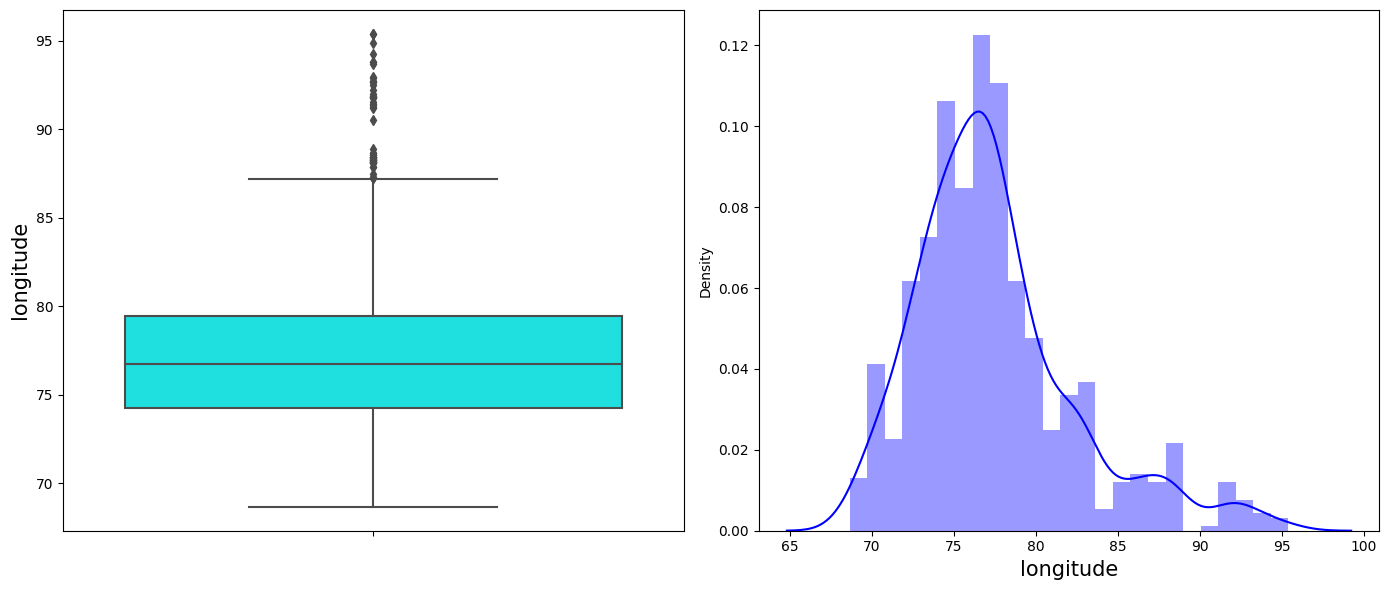

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=power_plant,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(power_plant['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

<b> We will use the median to estimate longitude based on the presence of outliers.  </b>

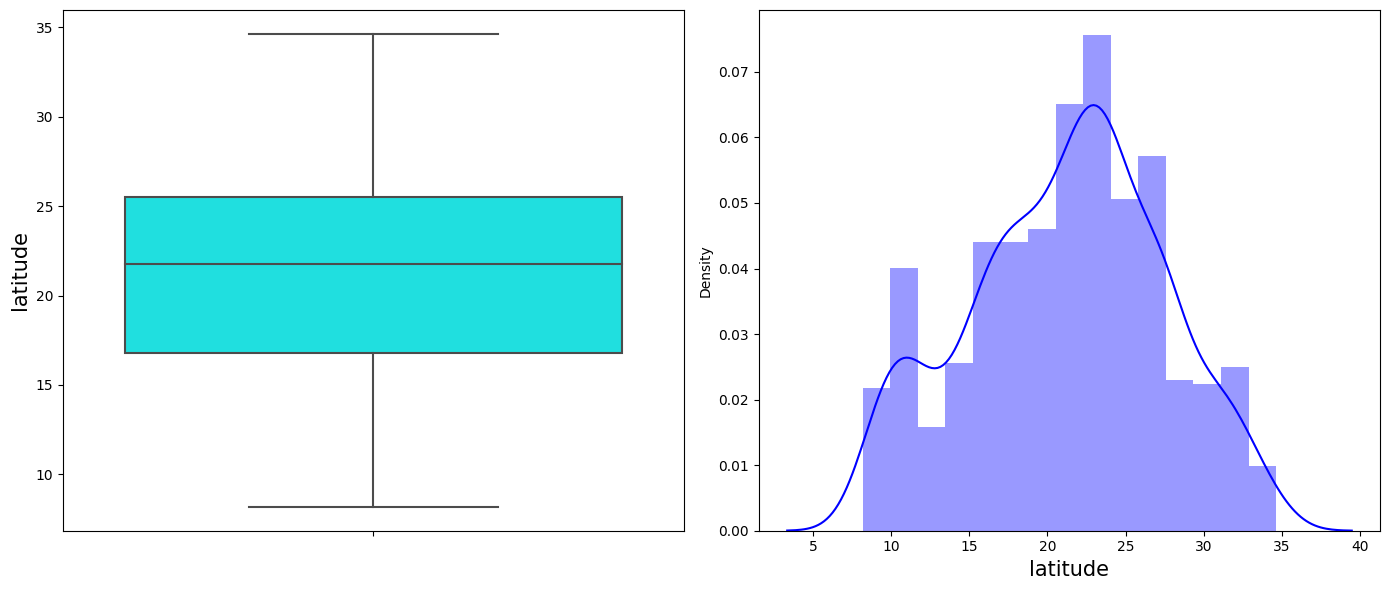

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=power_plant,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(power_plant['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

### If there are no outliers, we will assume latitude and use the mean. 

In [13]:
# Using MODE NULL values of Geolocation are assessed
power_plant['geolocation_source'] = power_plant['geolocation_source'].fillna(power_plant['geolocation_source'].mode()[0])
# Using MEDIAN NULL values of Longitude are assessed
power_plant['longitude'] = power_plant['longitude'].fillna(power_plant['longitude'].median())
# Using MEAN NULL values of Latitude are assessed
power_plant['latitude'] = power_plant['latitude'].fillna(power_plant['latitude'].mean())

In [14]:
#Determining the dataset's missing data percentage
missing_values = power_plant.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(power_plant))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
name                                 0        0.000000
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
geolocation_source                   0        0.000000


### Statstical Matrix

In [15]:
power_plant.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,907.000000,907.000000,527.000000,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.427103,1997.091082,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.079148,4.815073,17.082868,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,17.072000,74.388900,1988.000000,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.281800,76.719500,2001.000000,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.176450,79.206100,2012.000000,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


#### Observation:
- The largest power plant has a 4760 MW power generation capacity.
- Mean is higher than Median in each column for Generation-GWHours.
- The latitude range for power plants is 8.1689 to 34.6490, and the longitude range is 68.64 to 95.4080.

- The most current power plant was built in 2018, and the oldest one was put into service in 1927. We will investigate when the majority of power plants are in operation.
- The MW capacity median is 60 MW. This indicates that the dataset has a large number of small capacity power plants.

<b><em> For the regression and classification models, we have two different target features. Let's begin investigating both Target Features.</em> </b>

## Capacity is the Regression Target feature.

<b>Before visualizing the feature, learn more about the smallest and largest power plants. </b>

In [16]:
print('Minimum Powerplant Performance:',power_plant.capacity_mw.min())
print('Maximum Powerplant Performance:',power_plant.capacity_mw.max())

Minimum Powerplant Performance: 0.0
Maximum Powerplant Performance: 4760.0


In [17]:
power_plant.loc[power_plant.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,NaN,27594.0,29047.0,30015.0,35116.0,35136.0,NaN,Central Electricity Authority


In [18]:
power_plant.loc[power_plant.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations :
- <b> According to a database, VINDH_CHAL STPS, with a power generation capacity of 4760 MW, is India's largest power plant.</b> As its name suggests, it is a thermal power plant that uses oil as a backup fuel in addition to coal as its primary fuel.
- Tata BP Electronics City Solar Panel Plant, with a capacity of 0 MW, is listed as the smallest power plant. <b>There was a data entry mistake here, as A power plant cannot be operational with a capacity of 0 MW.</b>

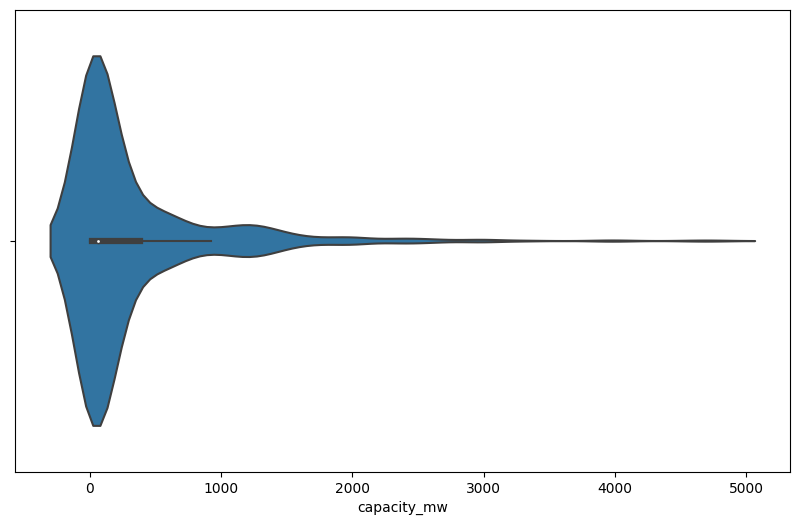

In [19]:
plt.figure(figsize=(10,6))
sns.violinplot(power_plant.capacity_mw)
plt.show()

<b> As we can see, every power plant has a capacity of at least 1500 MW. Check first</b>


In [20]:
power_plant.loc[power_plant.capacity_mw >1500].shape

(39, 17)

<b> Only 15 power plants with a capacity of more than 1500 MW exist.</b>

In [21]:
pd.crosstab(power_plant['capacity_mw'],power_plant["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

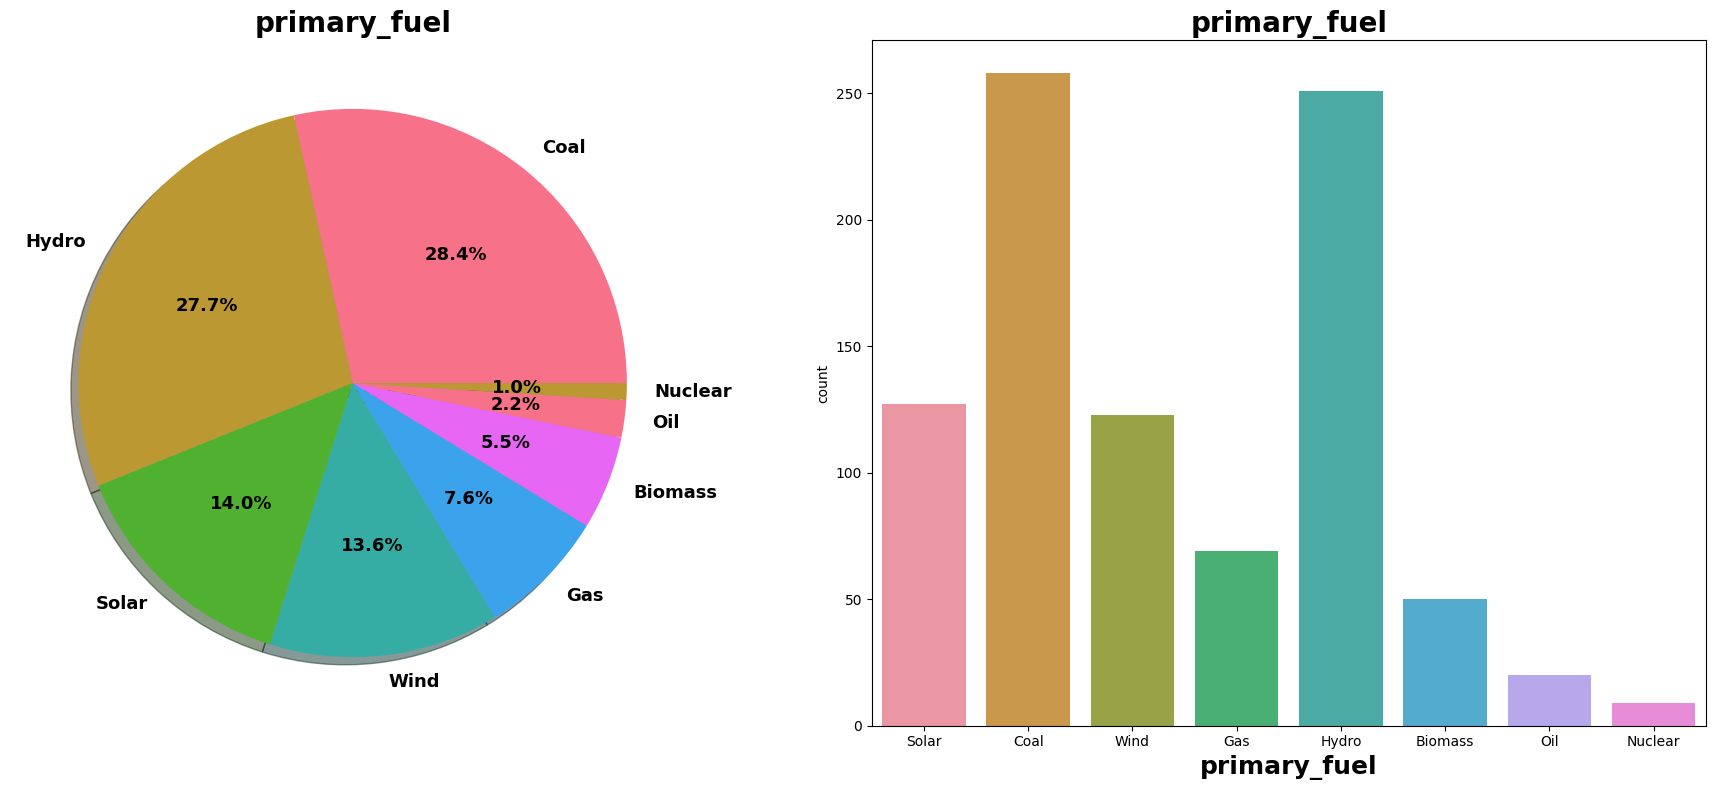

In [22]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
power_plant['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=power_plant,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [23]:
power_plant.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

#### Observations:
- Coal-based power stations are the most prevalent, followed by hydroelectric power plants.
- <b>A little over 40% of power plants are unconventional, with a focus on non-renewable energy sources.</b>
- Only 9 nuclear power plants exist. These power plants are often designed for high capacity.<b> Looking at these powerplants' capacities will be fascinating.</b>

<b> Then, we'll seek for powerplant capacity according to fuel type. Let's start by determining the total generation capacity of all powerplants.</b> 

In [24]:
print('Total Capacity of All Power Plants for Power Generation:',power_plant['capacity_mw'].sum(),'MW')

Total Capacity of All Power Plants for Power Generation: 295884.946 MW


<b> The total capacity for power generation in India is 291510.11 MW.

Now, let's examine capacity by sector.
</b>


In [25]:
power_plant["capacity_mw"].groupby(power_plant["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


#### Observations :
<b> The majority of total power generation is produced by coal. 

Here's another intriguing finding that confirms what we previously knew. Nuclear power stations have a bigger overall capability for producing electricity than other unconventional energy-based power plants combined (biomass, wind, and solar).</b>

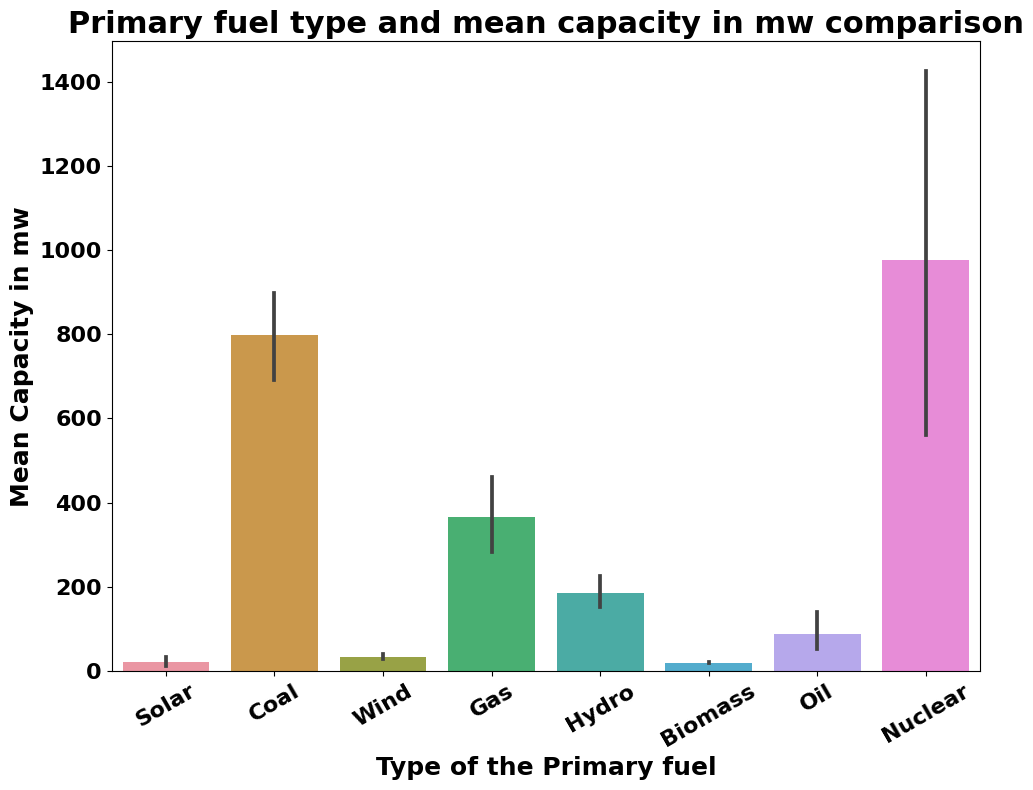

In [26]:
#Let's examine the relationship between primary fuel and average power output.
plt.figure(figsize = (10,8))
y = power_plant["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = power_plant)
plt.title('Primary fuel type and mean capacity in mw comparison', fontsize=22, fontweight='bold')
p.set_xlabel('Type of the Primary fuel',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

<b> Above result is obvious as only 9 Nuclear powerplant hence its mean Capacity is larger.</b>

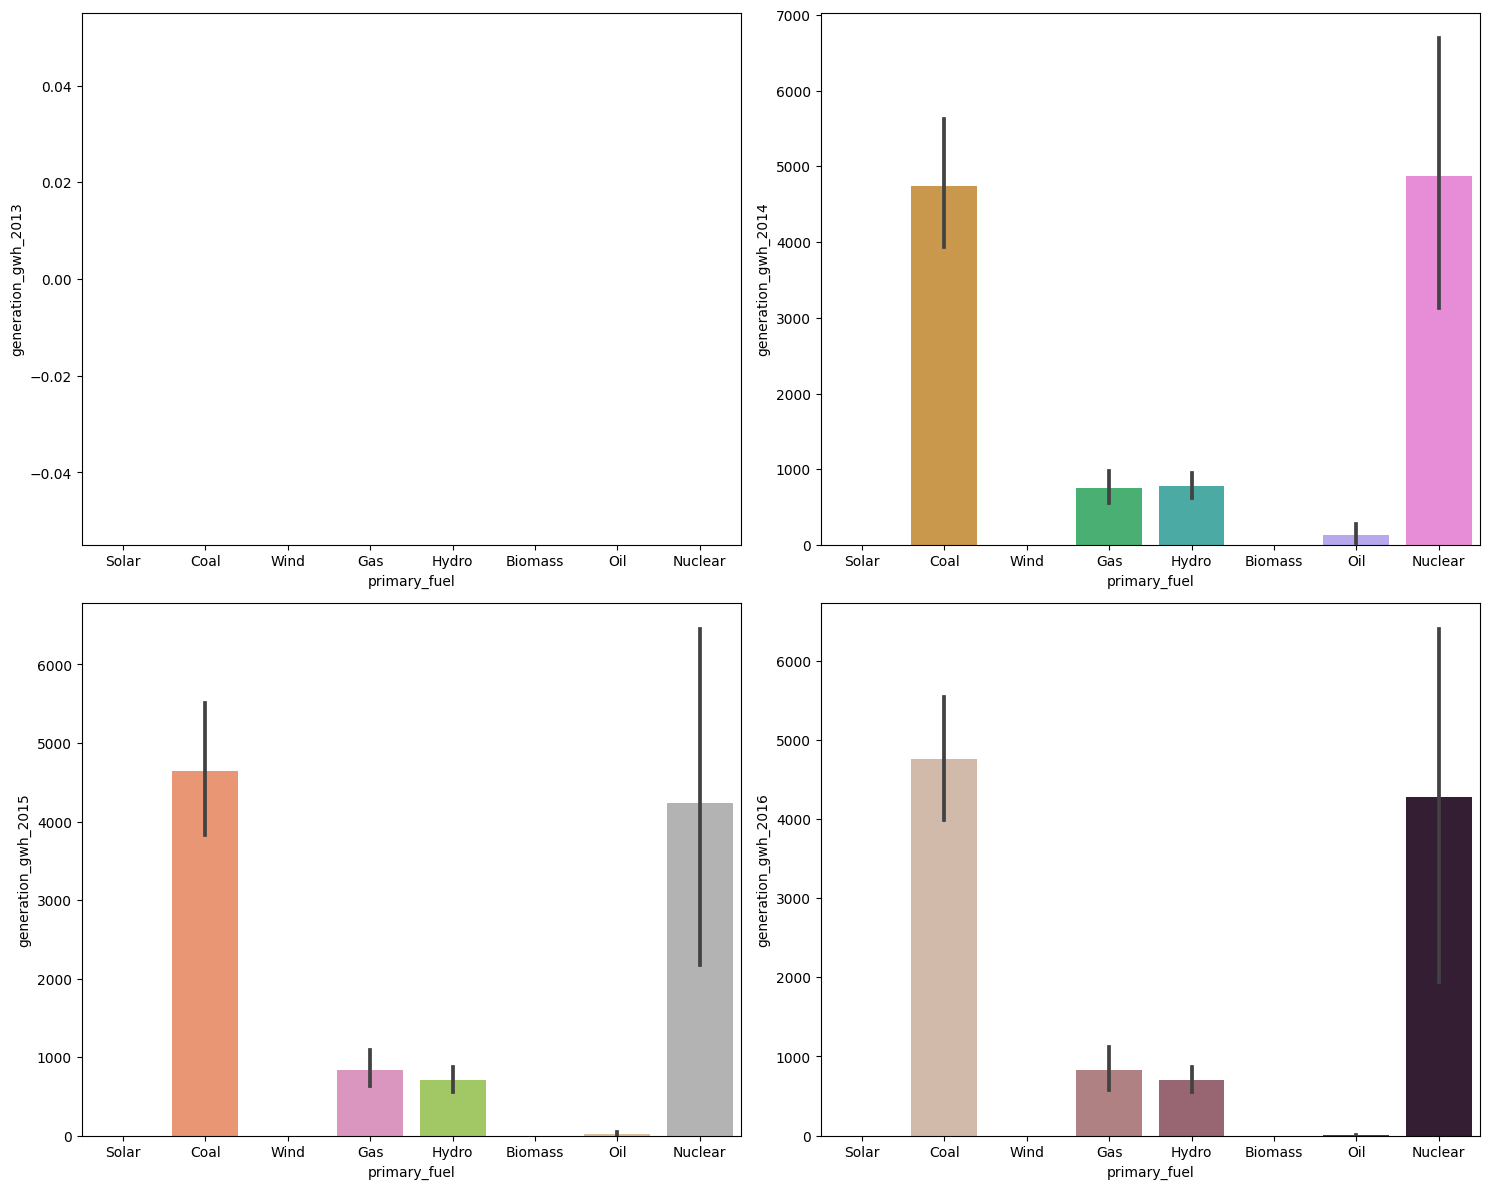

In [27]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# 2013 generational growth analysis
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=power_plant)

# 2014 generational growth analysis
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=power_plant)

# 2015 generational growth analysis
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=power_plant,palette="Set2")

# 2016 generational growth analysis
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=power_plant,palette="ch:.25")
plt.show()

#### Observations:
- The graph shows that Nuclear has consistently had high mean electrical generation reports, with Coal coming in second.
The reason is nuclear power reactors' tremendous efficiency.
- Other fuel types contribute very little to the production of electricity.

### Location vs Primary Fuel

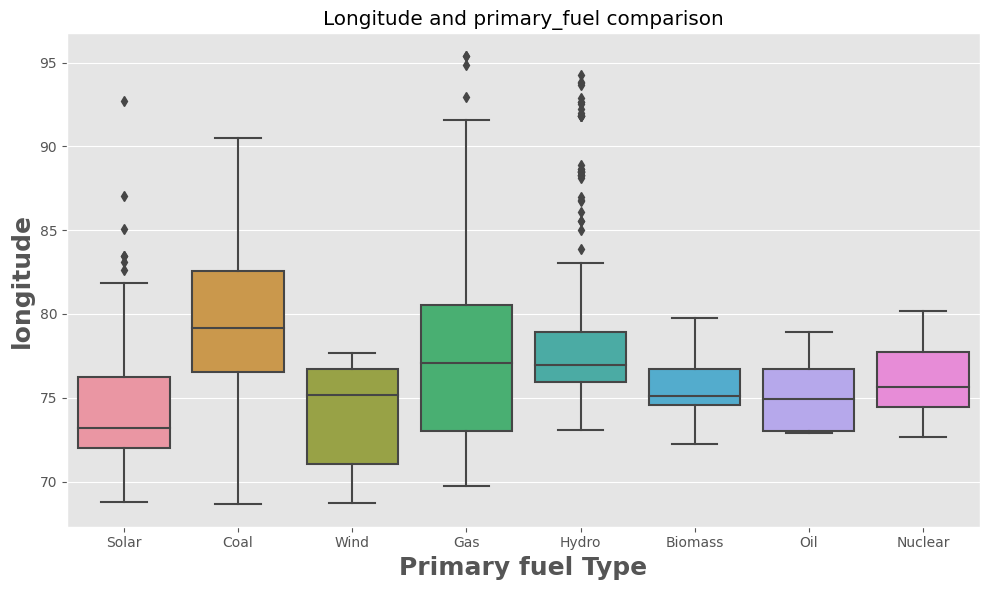

In [28]:
# Let's examine how the primary fuel relates to the power plant's longitude.
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Longitude and primary_fuel comparison')
a = sns.boxplot(power_plant['primary_fuel'],power_plant["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

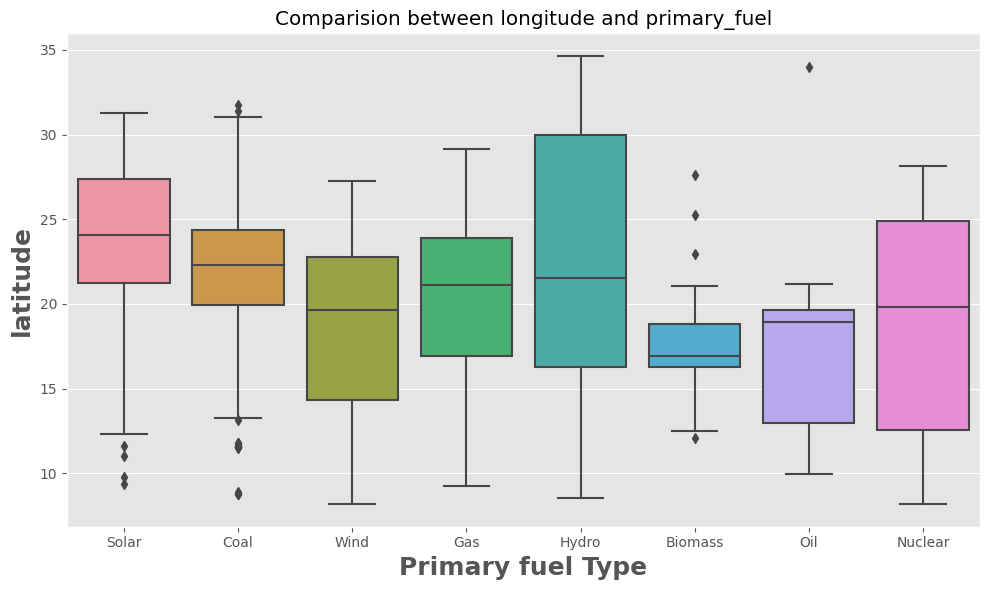

In [29]:
# Let's check how the primary_fuel is reated to Latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(power_plant['primary_fuel'],power_plant["latitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

#### Observations:
- Location is a key factor, particularly for nuclear power facilities. These plants are located in the latitude range of 15 to 25 and the longitude range of 75 to 88 degrees.
- We may also see that the majority of solar power plants are located in a particular latitude and longitude area. This may be a result of the minimal humidity and clear, bright sunlight.

### Location vs Capacity

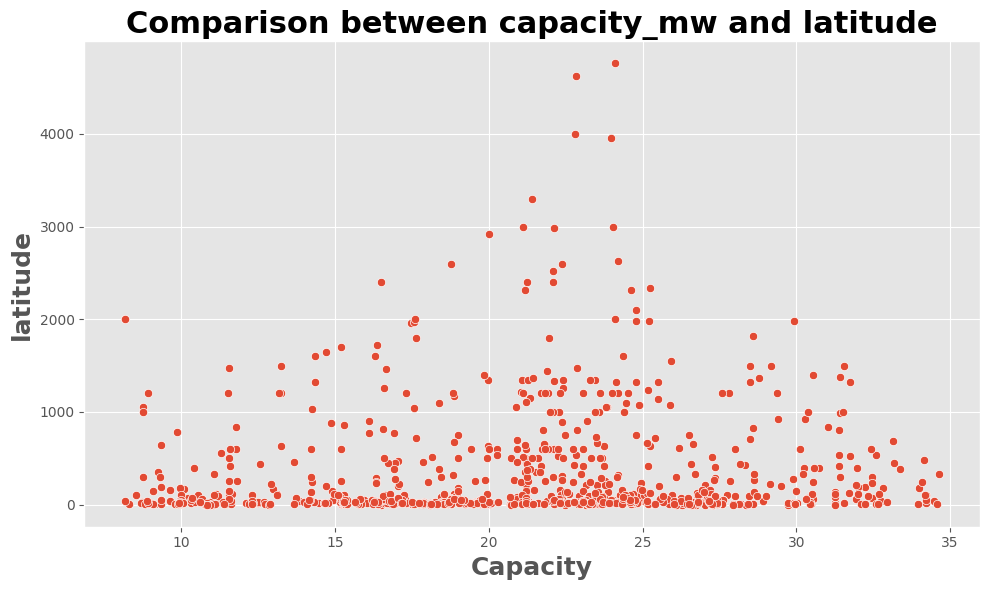

In [30]:
# Let's examine how the power plant's capacity relates to its latitude.
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between capacity_mw and latitude',fontsize=22, fontweight='bold')
a= sns.scatterplot(power_plant['latitude'],power_plant["capacity_mw"])
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

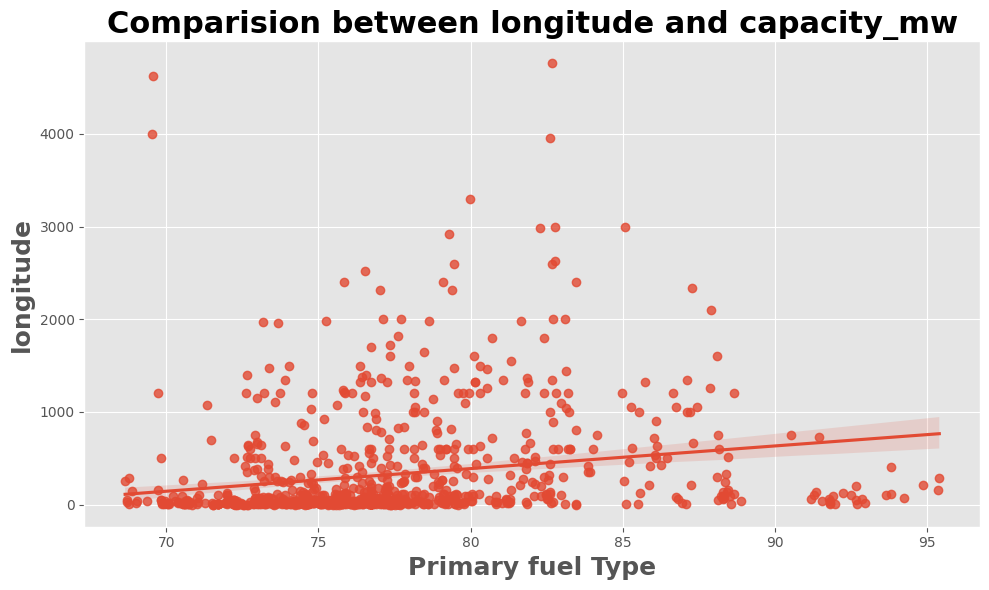

In [31]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(power_plant['longitude'],power_plant["capacity_mw"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

<b> Nothing new is learned from the graphs above.</b>

### Commission age vs primary fuel

In [32]:
# Let's calculate the age of the power plant from the commissioning year by deducting it from 2018
power_plant['Power_plant_age'] = 2018 - power_plant['commissioning_year']
power_plant.drop(columns=['commissioning_year'],inplace=True)

In [33]:
print('the earliest power plant :',power_plant.Power_plant_age.max())
print('the newest power plant :',power_plant.Power_plant_age.min())

the earliest power plant : 91.0
the newest power plant : 0.0


In [34]:
power_plant.loc[power_plant.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,NaN,220.82035,215.3777,144.4143,175.92595,282.76905,NaN,Central Electricity Authority,91.0


<b>The oldest power plant is SIVASAMUNDRUM, a hydroelectric facility with a 42 MW production capacity.</b>

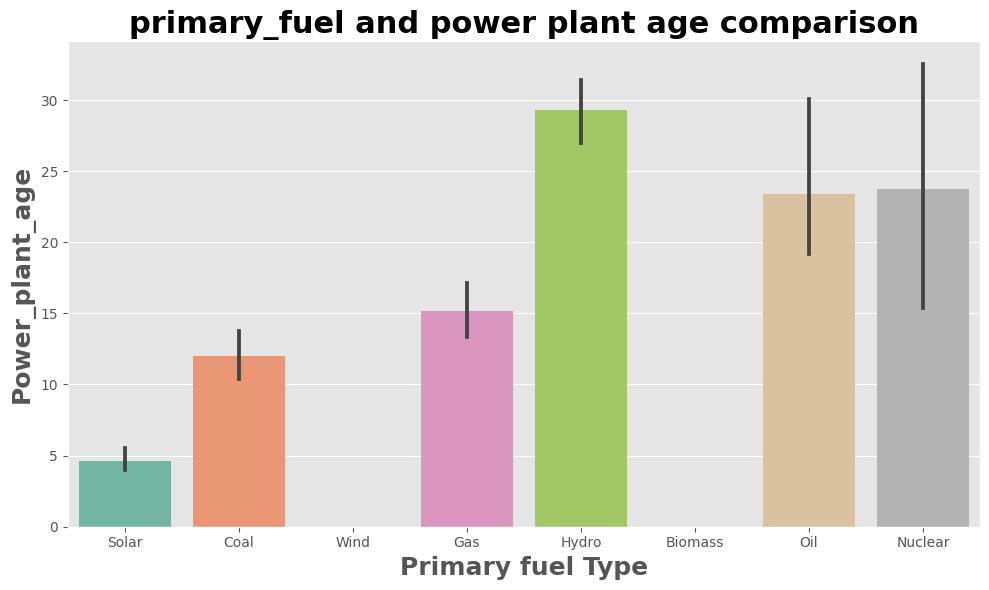

In [35]:
#Let's investigate how Fuel Type is impacted by Power Plant Age.
plt.figure(figsize = (10,6))
plt.title("primary_fuel and power plant age comparison", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = power_plant,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

<Axes: title={'center': 'Power_plant_age and capacity_mw Comparision'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

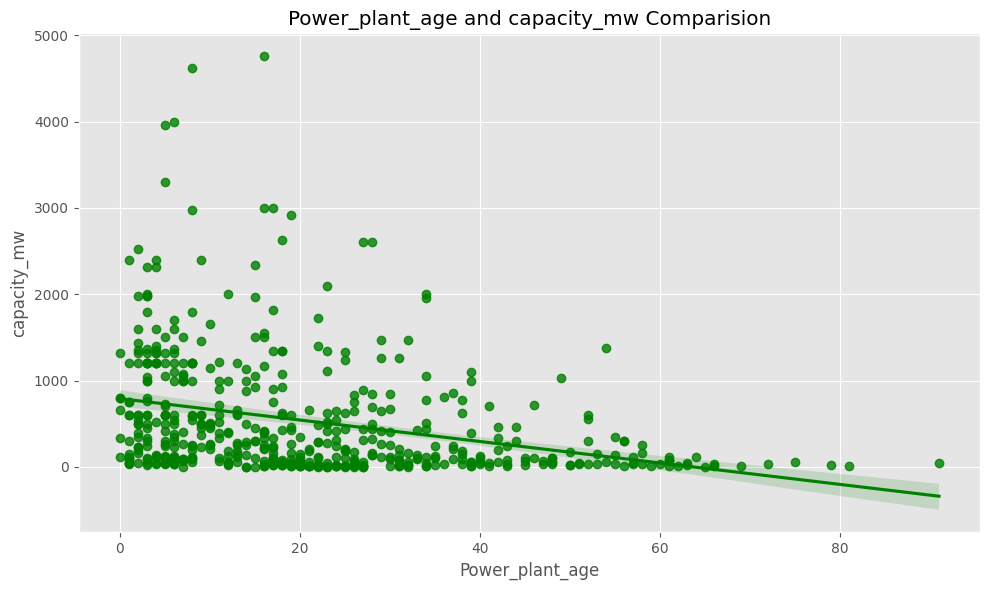

In [36]:
# Let's examine the impact of the power plant's age on its capacity.
plt.figure(figsize=[10,6])
plt.title('Power_plant_age and capacity_mw Comparision')
sns.regplot(power_plant['Power_plant_age'],power_plant['capacity_mw'],color = "g")

- The link between the feature and the label is inversely linear. 
- We might conclude that older plants' capacities are significantly lower than those of more current power plants.

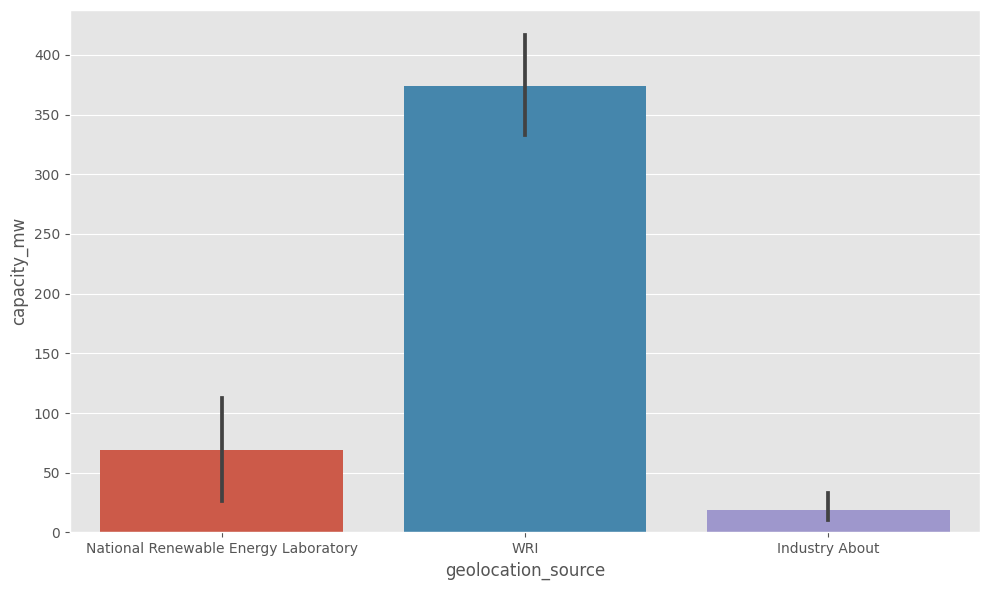

In [37]:
#Let's examine the connection between the source and the capacity_mw.
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = power_plant)
plt.show()

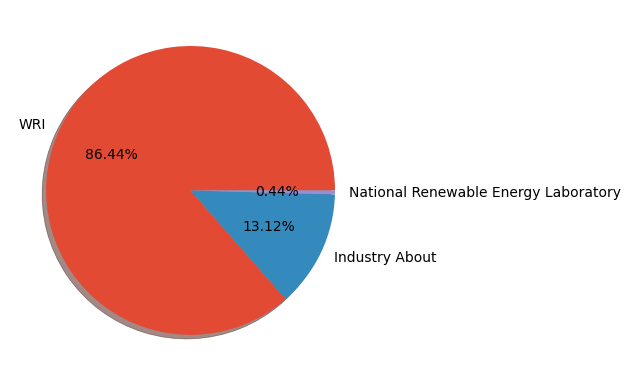

In [38]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(power_plant['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Geological sources with a maximum capacity of more than 350 megawatts are considered to be WRI sources. There is less capacity in the geological source.

## features Distribution 

In [39]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

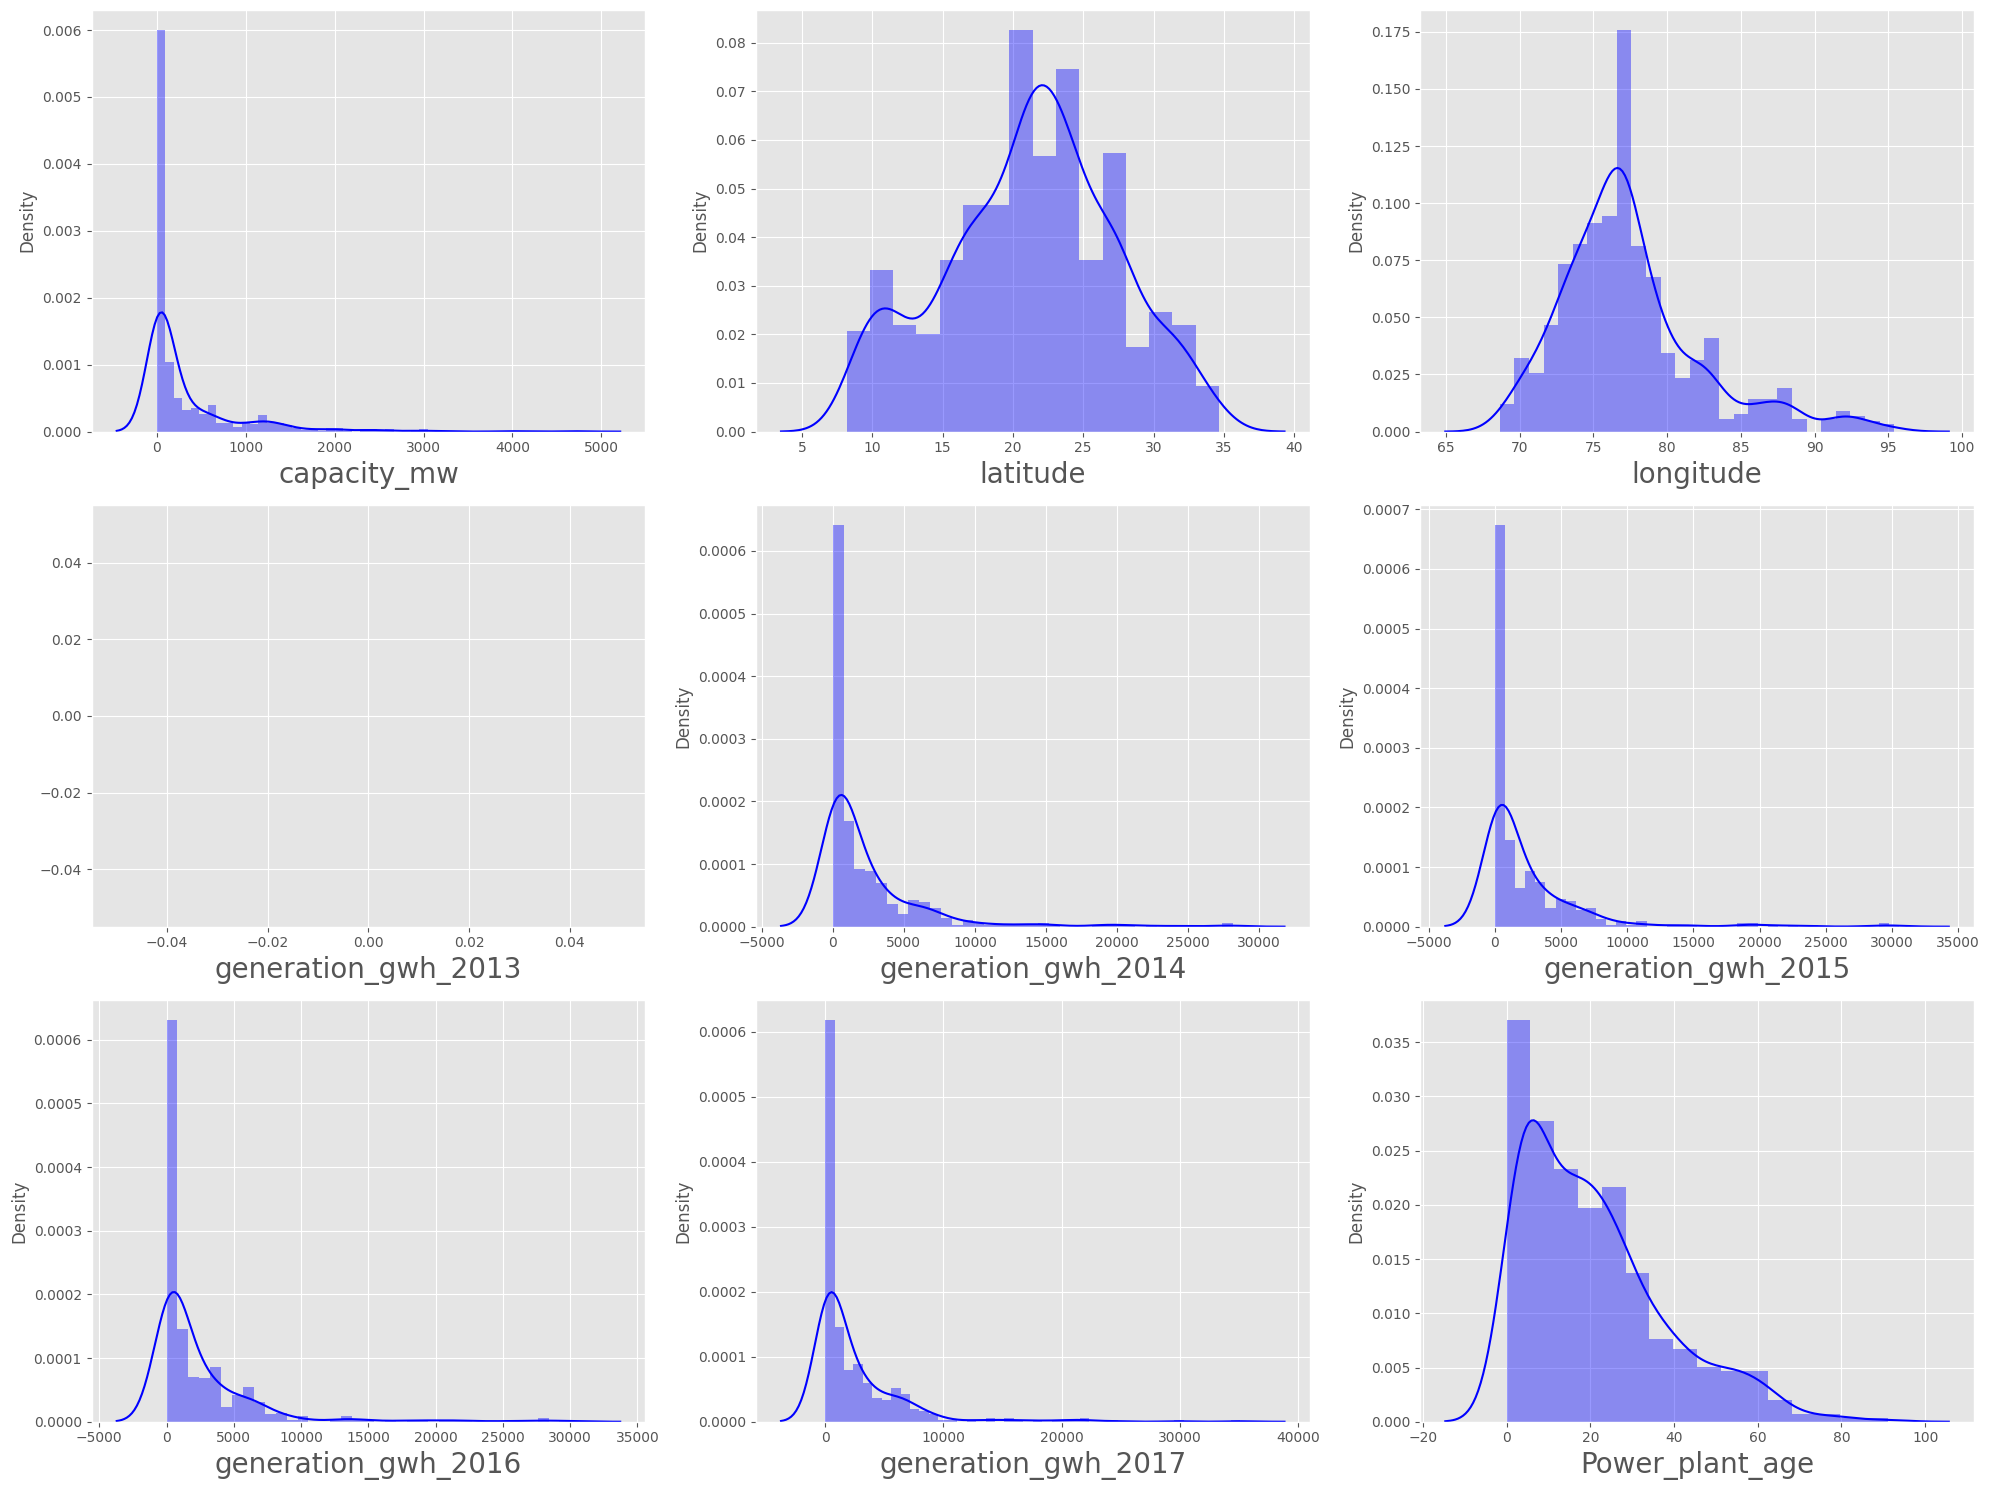

In [40]:
# Examining the distribution of the data in each column.

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(power_plant[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Observations:
- The distributionplot shown above shows that, with the exception of latitude and longitude, the data is not normally distributed over all of the columns.
- The majority of the columns are skewed to the right because their means are higher than their medians.
- All of these columns—aside from the label—will have the skewness removed later.

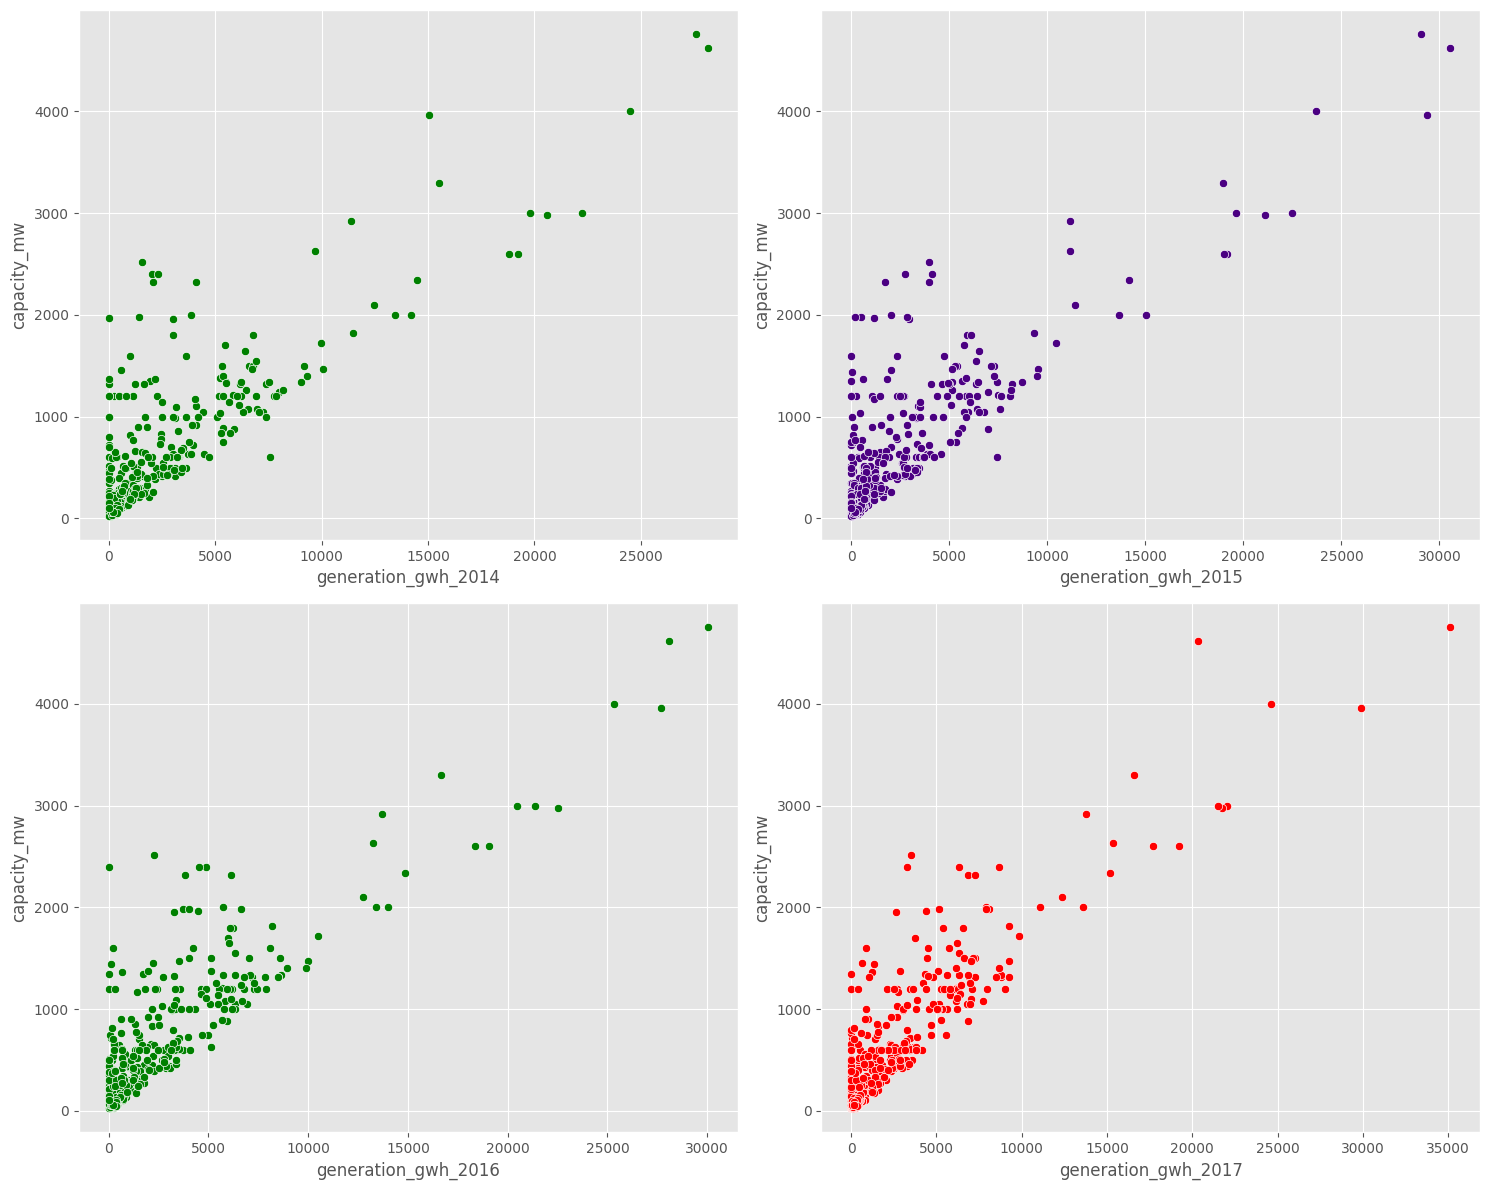

In [41]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# 2014 generational growth analysis
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=power_plant,color="g")

# 2015 generational growth analysis
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=power_plant,color="indigo")

# 2016 generational growth analysis
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=power_plant,color="g")

# 2017 generational growth analysis
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=power_plant,color="r")
plt.show()

#### Observation:
- The capacity and the reported power generation for the aforementioned years have a positive linear relationship.
- The plot demonstrates that the reported power generation for the years 2014, 2015, 2016, and 2017 has a high capacity of more than 1000mw. Additionally, the growth in electricity generation has exceeded 5000gwh every year.
- The capacity of the plant increases along with the expansion in power generation.

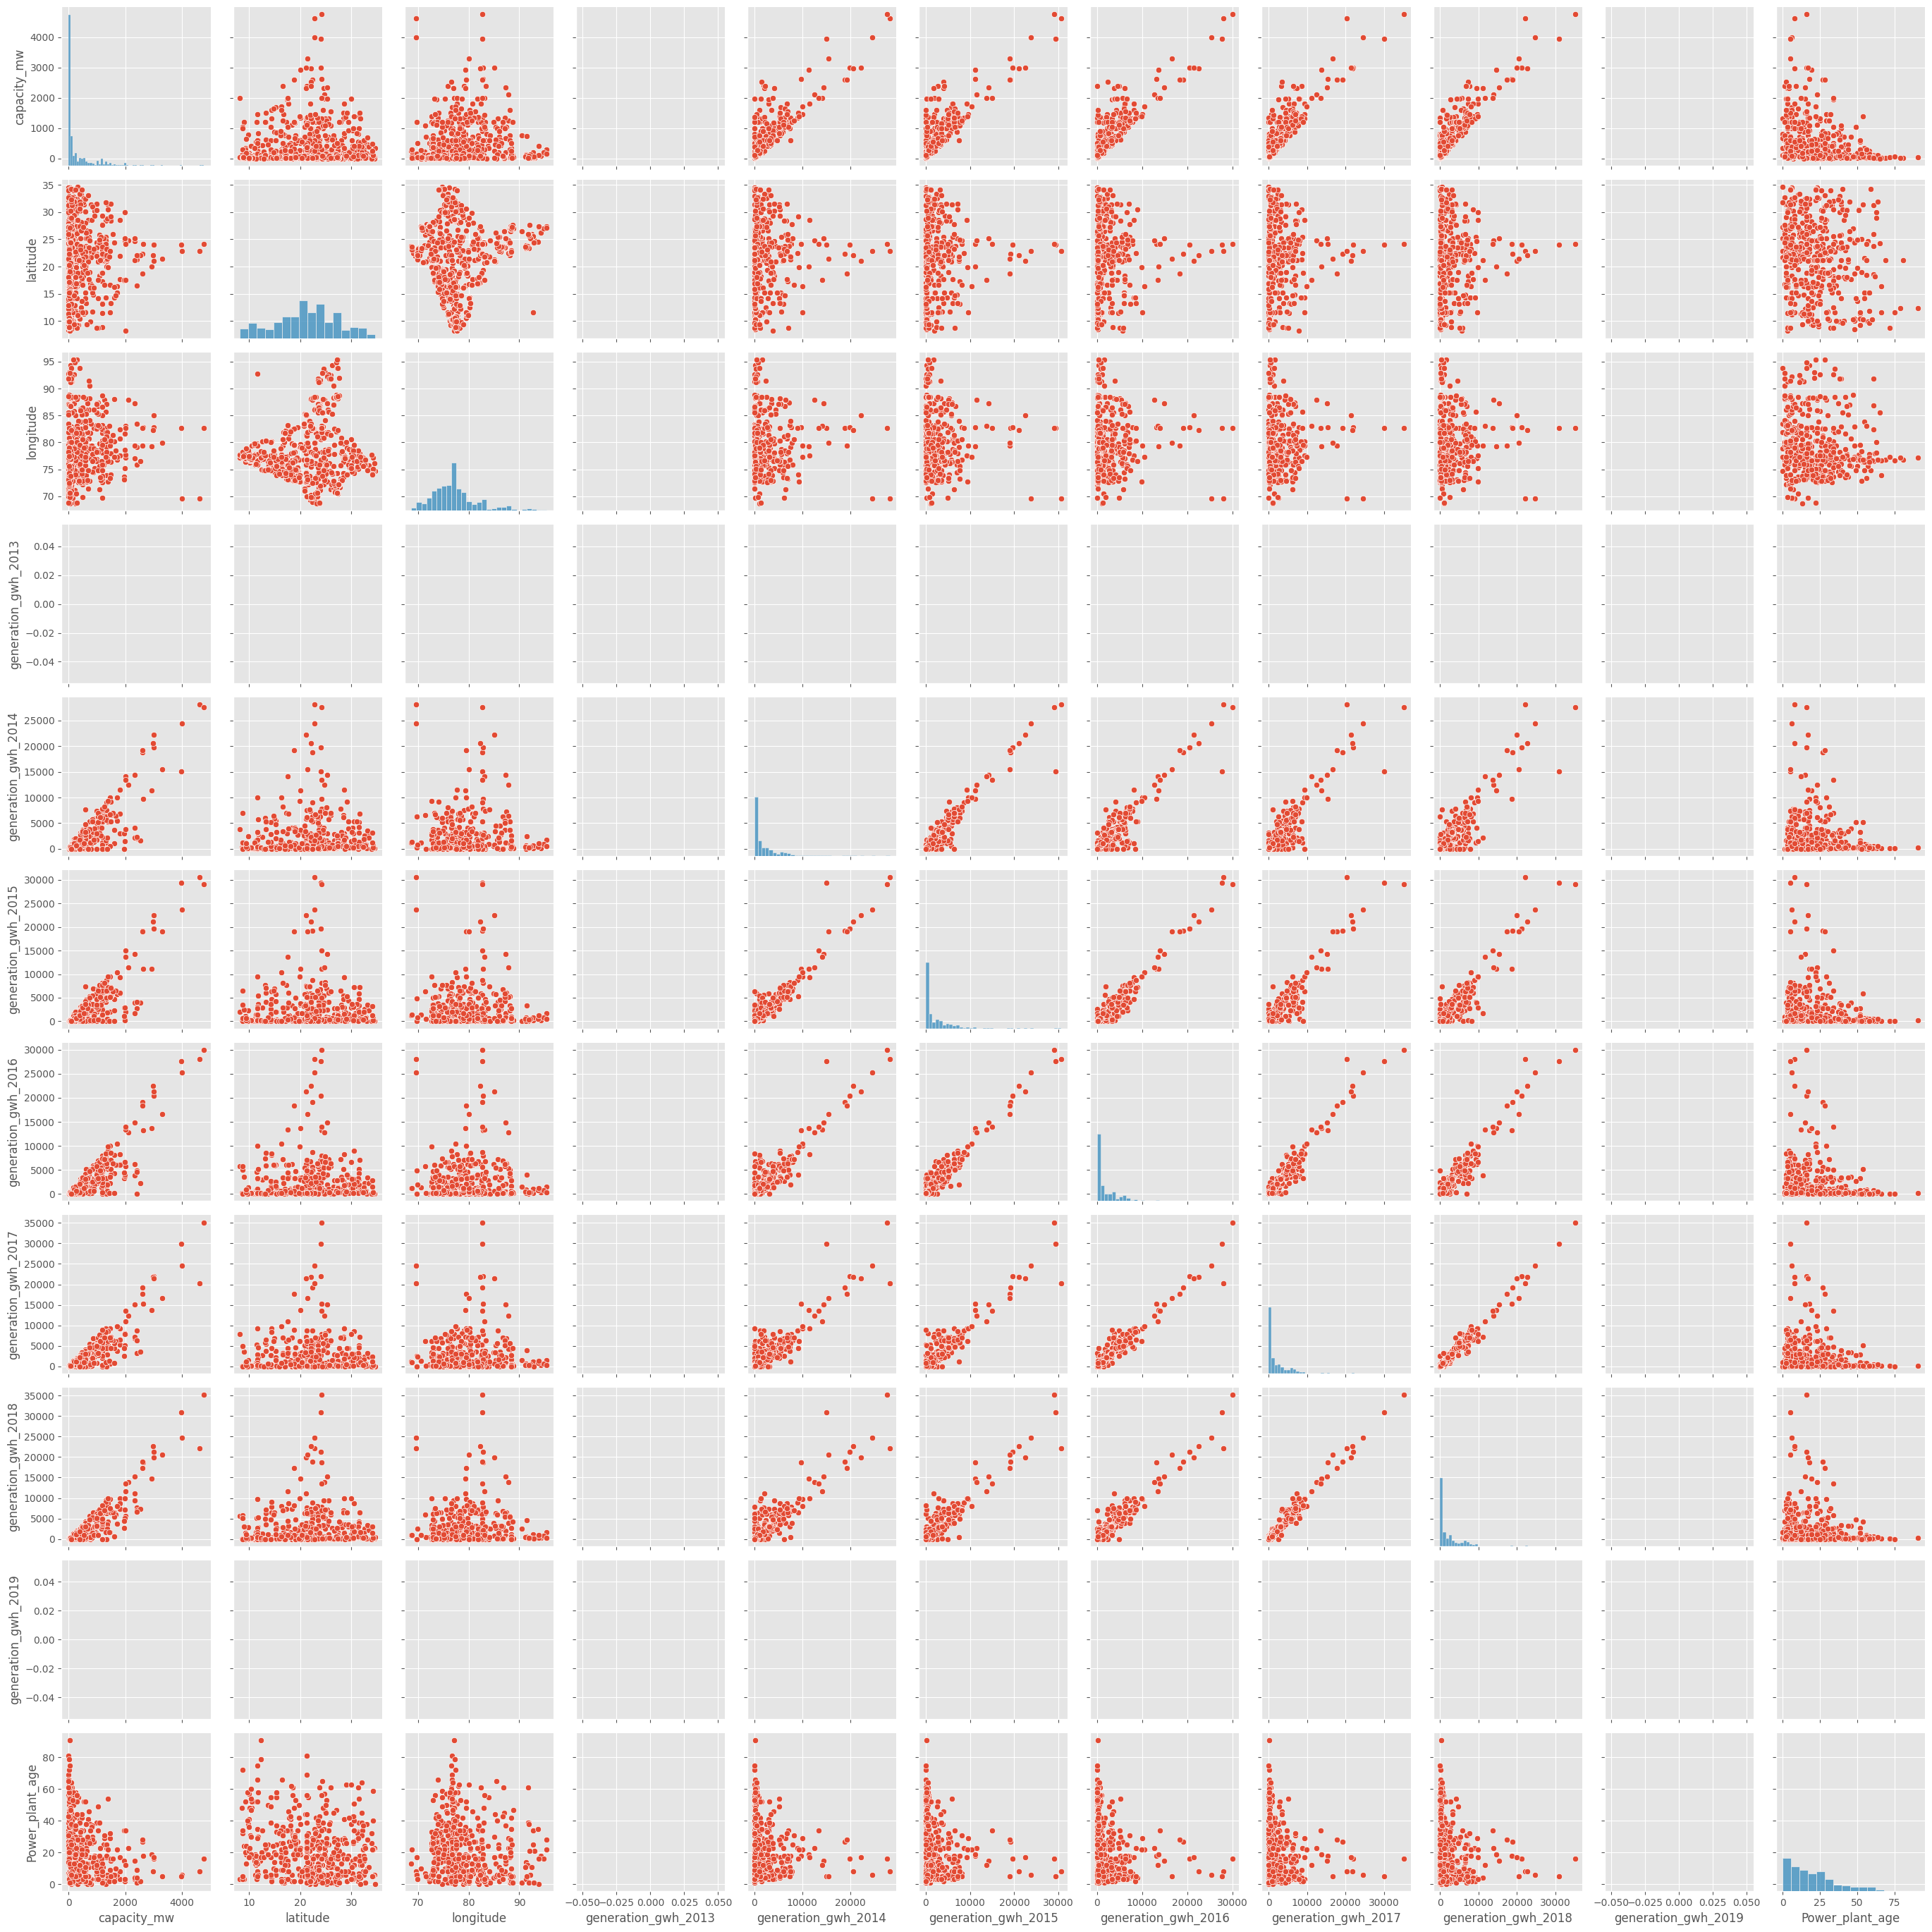

In [42]:
#Verifying the pairwise relationship between the label's megawatt capacity and its attributes.
sns.pairplot(power_plant)

####  Observations:
The majority of the features are strongly correlated and linearly related to one another.
- We can see the outliers in some of the columns from the plot.
- On the diagonal, the histogram is visible.

## Encoding the categorical data for easy processing

In [43]:
power_plant.drop(columns=['name'],axis=1,inplace=True)

In [44]:
power_plant.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [45]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [46]:
# Categorical variable using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    power_plant[i] = le.fit_transform(power_plant[i])
power_plant.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,3.0


### Detecting and removing outliers

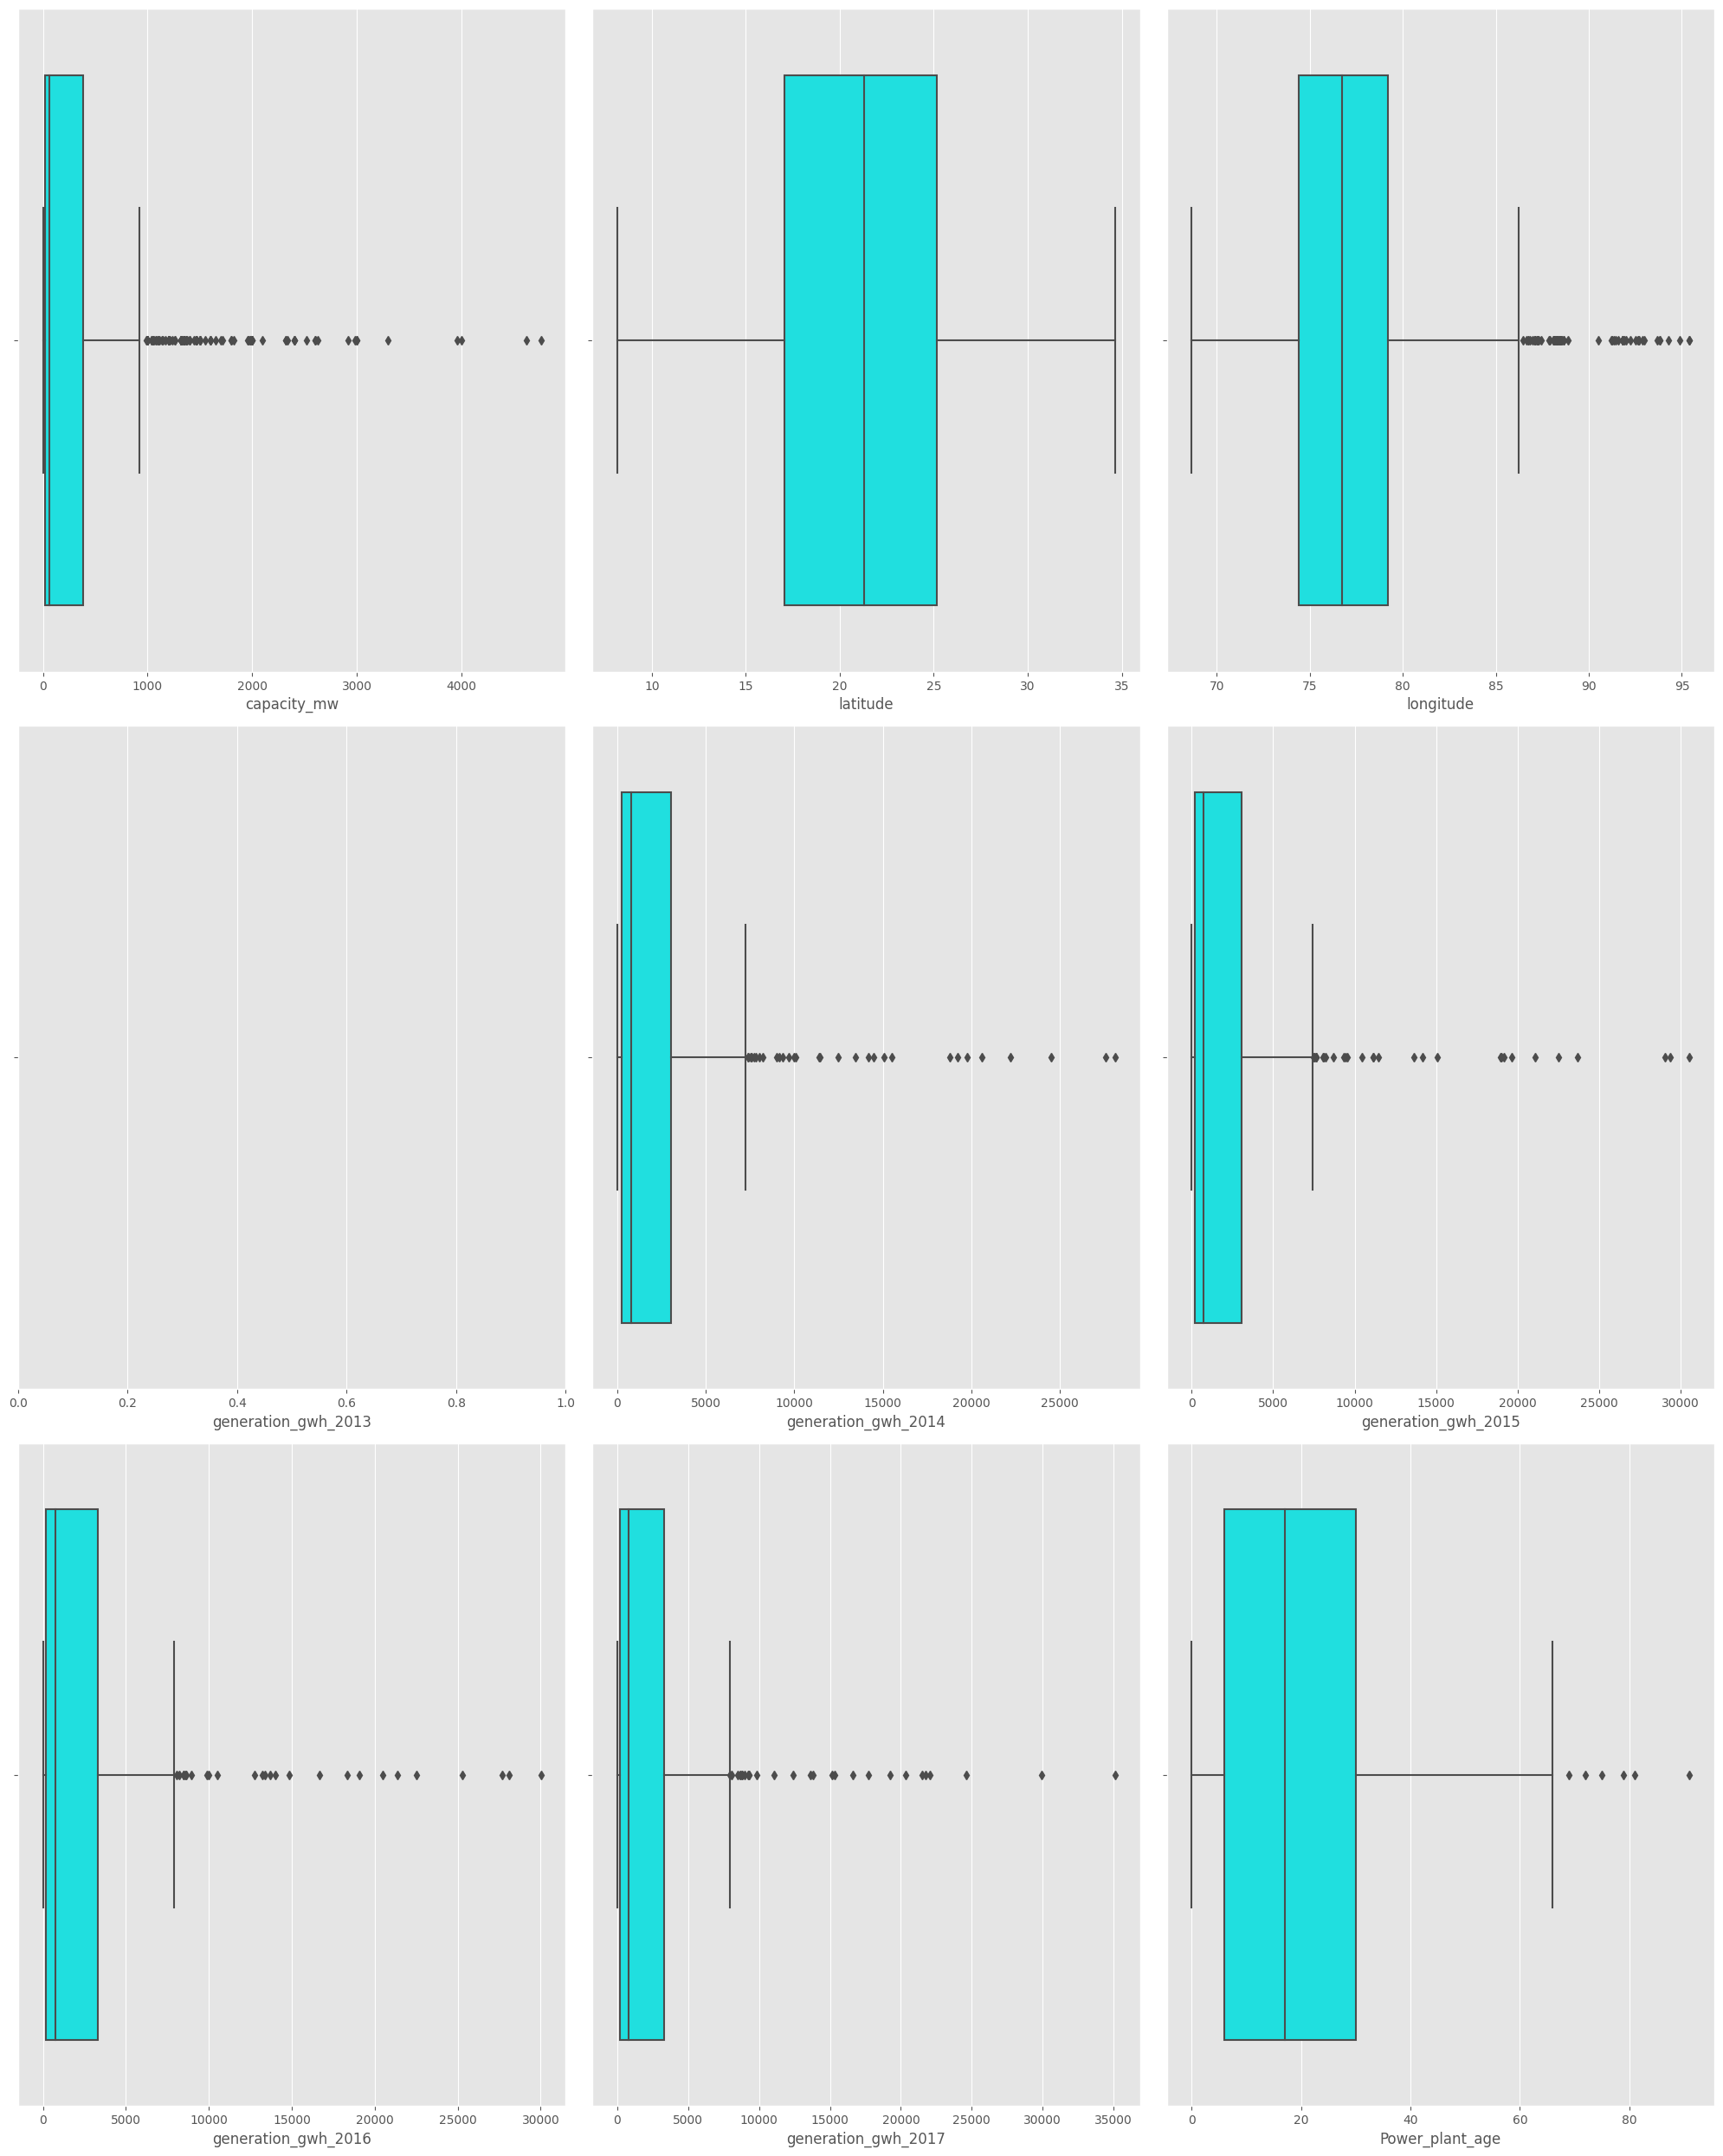

In [47]:
#Using a boxplot, find the outliers in numerical columns.

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(power_plant[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

#### Observations :
- Outliers can be found in data.
- In the lower capping level, there are no outliers.
- The Quantile-based Flooring and Capping technique will be used as a result.


### On the basis of the Quantile-based Flooring and Capping approach, further outliers will be investigated. With this method, we will floor the lower values at, say, the 10th percentile, and cap the higher values at, say, the 75th percentile.

In [48]:
# Elimination of superfluous columns
power_plant.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [49]:
power_plant2=power_plant.copy

In [50]:
power_plant3=power_plant.copy()
Q1 = power_plant3.quantile(0)
Q3= power_plant3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2013           NaN
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
generation_gwh_2019           NaN
Power_plant_age          39.00000
dtype: float64


In [51]:
data = power_plant3[~((power_plant3 < (Q1 - 1.5 * IQR)) |(power_plant3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 13)


##### Data Loss

In [52]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((907-877)/877)*100,'%')

Percentage Data Loss : 3.4207525655644244 %


### Correlation matrix

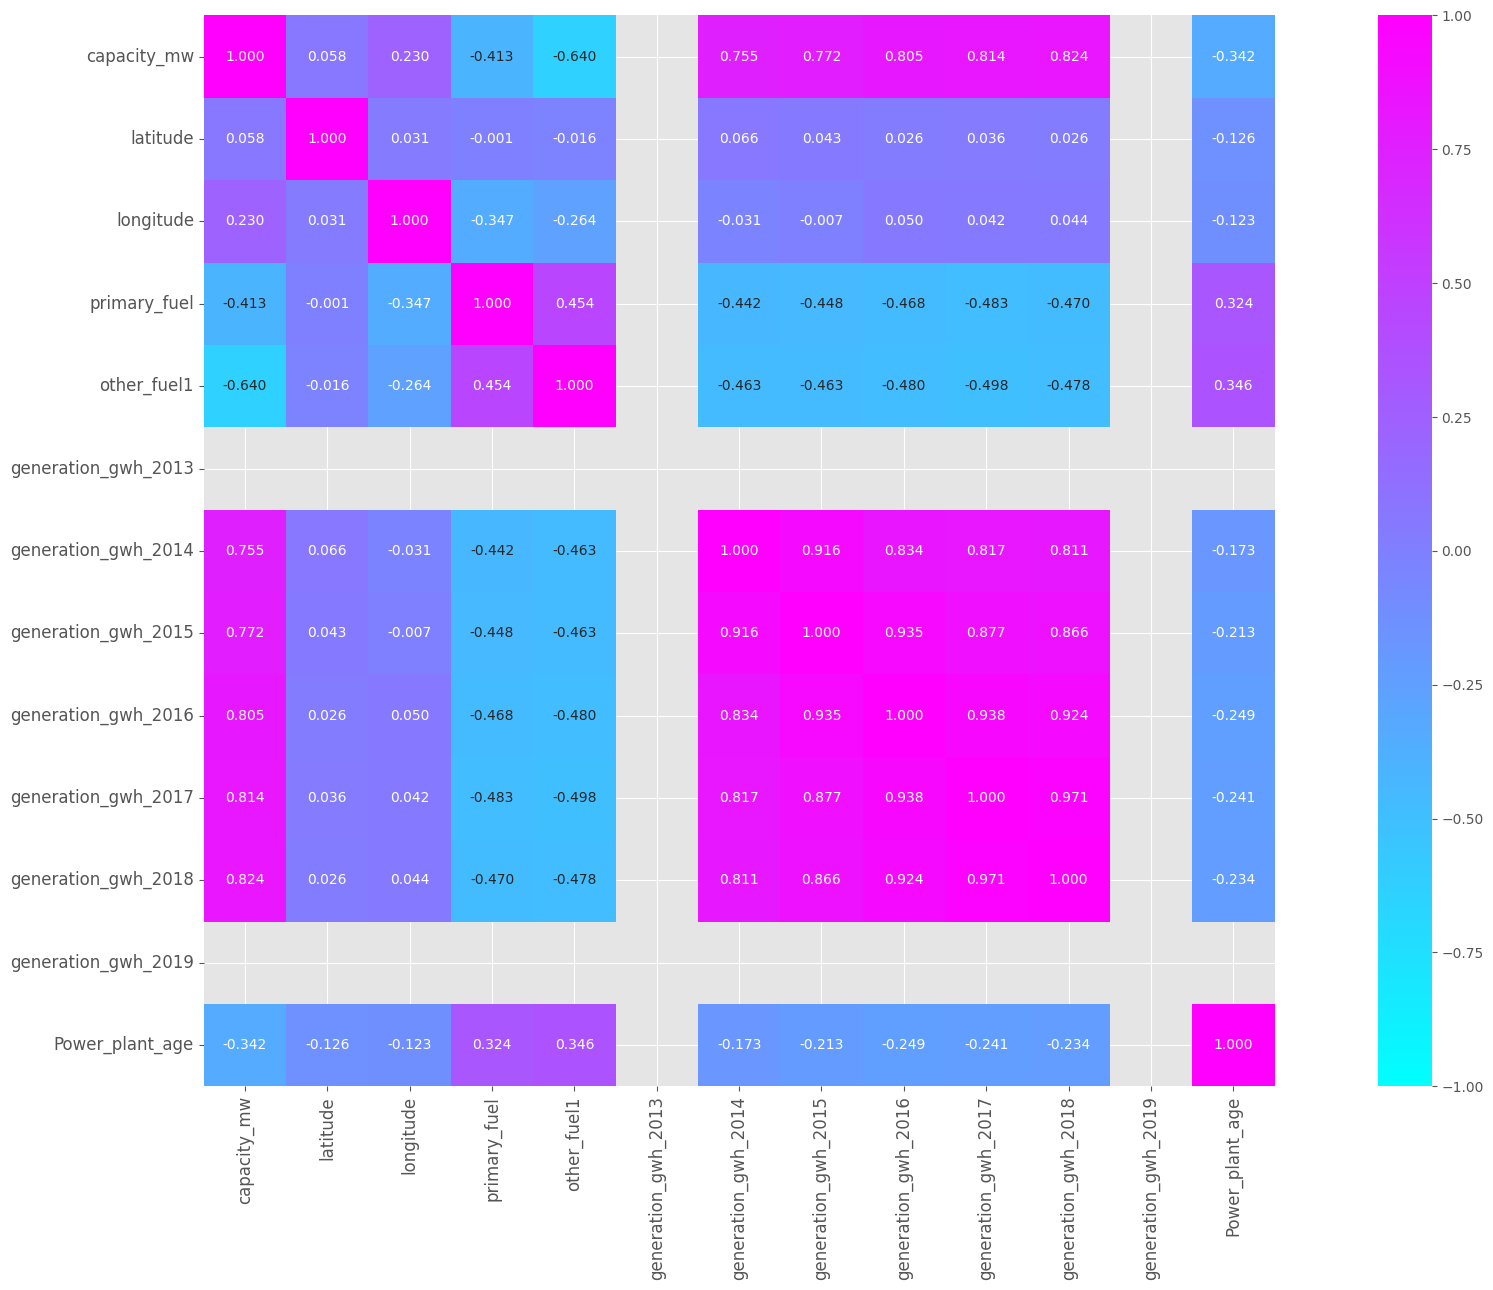

In [53]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- The attributes generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014, and generation_gwh_2013 have a strong positive correlation with the label capacity_mw.
- The attributes primary_fuel, source, and Powe_plant_age have a negative correlation with capacity.

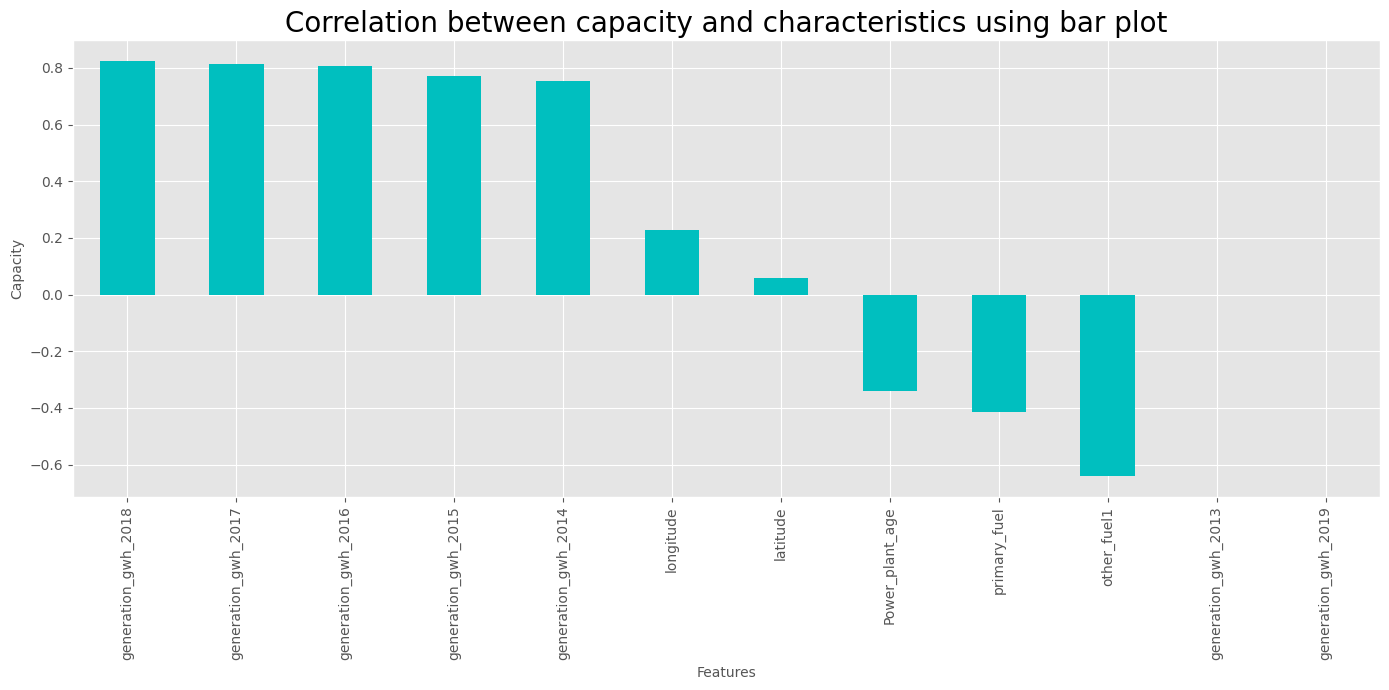

In [54]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and characteristics using bar plot',fontsize=20)
plt.show()

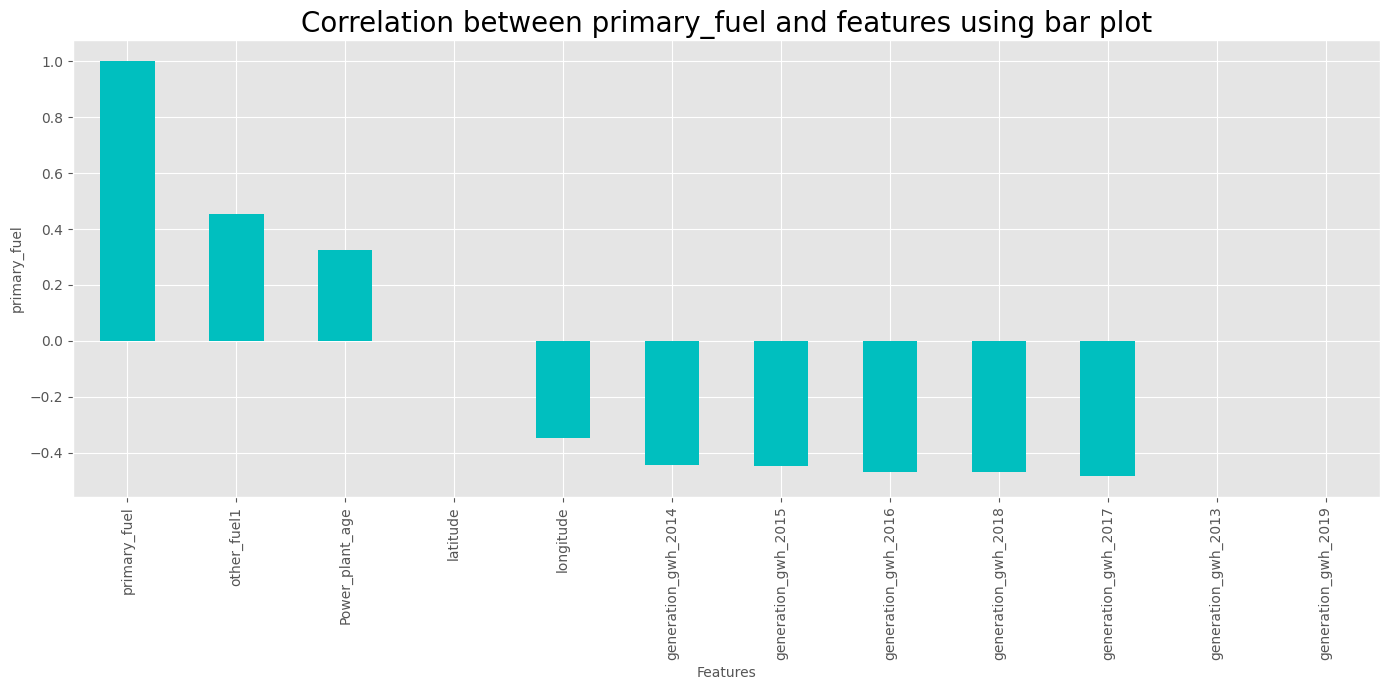

In [55]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

## Skewness

In [56]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              1.221398
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2013         NaN
generation_gwh_2014    1.610443
generation_gwh_2015    1.536958
generation_gwh_2016    1.594947
generation_gwh_2017    1.489783
generation_gwh_2018    1.532123
generation_gwh_2019         NaN
Power_plant_age        1.030123
dtype: float64

In [57]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [58]:
import numpy, warnings
numpy.warnings= warnings
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,NaN,-0.115824,0.109529,0.134579,-0.043225,-0.178934
4,1.147361,-2.024155,NaN,0.916782,1.451544,1.495059,1.348860,-1.370997


In [59]:
# Verifying skewness following use of Yeo-Johnson
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              0.002120
primary_fuel           0.425807
other_fuel1           -1.533254
generation_gwh_2013         NaN
generation_gwh_2014   -0.134464
generation_gwh_2015   -0.142379
generation_gwh_2016   -0.136447
generation_gwh_2017   -0.155373
generation_gwh_2018    1.532123
generation_gwh_2019         NaN
Power_plant_age       -0.075616
dtype: float64

In [60]:
# Due to poor correlation and a large number of missing values, we shall stop using alternative fuel.
data.drop("other_fuel1",axis=1,inplace=True)
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2019",axis=1,inplace=True)

In [61]:
#Because of the low correlation and numerous missing values, we shall stop using alternative fuel.
#data.drop("other_fuel1",axis=1,inplace=True)
#Absence of Value Latitude estimation using the mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

#### Now that EDA is complete, it's time to remove any missing data. 

In [63]:
#data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)
#data.drop("generation_gwh_2019",axis=1,inplace=True)

# Building Machine Learning Models and Classification

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

## Implementing Standard Scaling

In [65]:
# Data splitting into dependent and target features
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [66]:
X

,capacity_mw,latitude,longitude,Power_plant_age
0,2.5,28.1839,-0.933334,-8.032651e-01
1,98.0,24.7663,-0.516718,3.210283e-16
2,39.2,21.9038,-2.413165,3.210283e-16
3,135.0,23.8712,2.166057,-1.789344e-01
4,1800.0,21.9603,1.147361,-1.370997e+00
...,...,...,...,...
902,1600.0,16.2949,0.190109,-1.574886e+00
903,3.0,12.8932,0.369881,3.210283e-16
904,25.5,15.2758,-0.248308,3.210283e-16
905,80.0,24.3500,-0.773353,3.210283e-16


In [67]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Matrix Sixe of the Training Feature Variables:',X_train.shape)
print('Size of the Target Training vector:',Y_train.shape)
print('Matrix size of the Test Feature Variables:',X_test.shape)
print('Size of the Target Test vector:',Y_test.shape)

Matrix Sixe of the Training Feature Variables: (613, 4)
Size of the Target Training vector: (613,)
Matrix size of the Test Feature Variables: (264, 4)
Size of the Target Test vector: (264,)


### best random state Classifier discovery

In [69]:
Y_train

348    3
658    6
635    2
538    3
381    1
      ..
737    3
172    1
189    1
36     6
661    6
Name: primary_fuel, Length: 613, dtype: int32

In [70]:
X_train

array([[-3.27552554e-01, -1.01842037e+00, -5.22067120e-01,
         2.72646436e-01],
       [-5.07426564e-01,  4.54176822e-01,  3.98491560e-02,
         6.70359854e-18],
       [ 5.91765688e-02,  1.00542612e+00, -1.91381112e+00,
        -6.65251362e-01],
       ...,
       [ 1.93372072e+00,  3.91455726e-01,  1.77297725e+00,
        -1.06596763e+00],
       [-6.23059857e-01,  1.00831943e+00, -1.46715014e+00,
         6.70359854e-18],
       [-6.10211713e-01,  1.43466596e+00, -3.61088703e-01,
         6.70359854e-18]])

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6098484848484849 on Random_state 517


## Logistics Regression Model

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Logistics Regression-Accuracy Score :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of the Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of the Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Logistics Regression-Accuracy Score : 0.48863636363636365


Confusion matrix of the Logistics Regression : 
 [[ 0  0  0  1  0  0  1 10]
 [ 0 43  0 20  0  0  3  3]
 [ 0  8  0  7  0  0  0  3]
 [ 0 21  0 43  0  0  0  8]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  3  0  0  0  2]
 [ 0  0  0  9  0  0 23  8]
 [ 0  1  0  8  0  0 15 20]]


classification Report of the Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.57      0.62      0.60        69
           2       0.00      0.00      0.00        18
           3       0.46      0.60      0.52        72
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.55      0.57      0.56        40
           7       0.37      0.45      0.41        44

    accuracy                           0.49       264
   macro avg       0.24      0.28      0.26 

### Decision Tree Classifier

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.6742424242424242


Confusion matrix of DecisionTreeClassifier : 
 [[ 6  2  0  0  0  0  1  3]
 [ 1 43  6 11  0  2  4  2]
 [ 0  3  4  8  0  2  0  1]
 [ 0  7  4 60  0  0  1  0]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  1  2  0  1  0  0]
 [ 2  3  0  0  0  0 35  0]
 [ 2  2  1  0  0  0 10 29]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.68      0.62      0.65        69
           2       0.24      0.22      0.23        18
           3       0.73      0.83      0.78        72
           4       0.00      0.00      0.00         4
           5       0.20      0.20      0.20         5
           6       0.69      0.88      0.77        40
           7       0.83      0.66      0.73        44

    accuracy                           0.67       264
   macro avg       0.49      0.49      0.4

### Random Forest Classifier

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7462121212121212


Confusion matrix of RandomForestClassifier : 
 [[ 8  3  0  0  0  0  1  0]
 [ 2 52  4  8  0  1  0  2]
 [ 0  5  7  5  0  0  0  1]
 [ 0  5  3 63  0  0  0  1]
 [ 0  3  0  1  0  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 0  3  0  0  0  0 32  5]
 [ 2  1  0  0  0  0  8 33]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.71      0.75      0.73        69
           2       0.50      0.39      0.44        18
           3       0.80      0.88      0.83        72
           4       0.00      0.00      0.00         4
           5       0.67      0.40      0.50         5
           6       0.78      0.80      0.79        40
           7       0.79      0.75      0.77        44

    accuracy                           0.75       264
   macro avg       0.61      0.58      0.5

### ExtraTreesClassifier()

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.7727272727272727


Confusion matrix of ExtraTreesClassifier : 
 [[ 8  2  0  0  0  0  1  1]
 [ 0 55  4  8  0  1  0  1]
 [ 0  4 12  2  0  0  0  0]
 [ 0  8  2 61  0  0  0  1]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 6  2  0  0  0  0 31  1]
 [ 1  3  0  0  0  0  5 35]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.71      0.80      0.75        69
           2       0.63      0.67      0.65        18
           3       0.82      0.85      0.84        72
           4       0.00      0.00      0.00         4
           5       0.67      0.40      0.50         5
           6       0.84      0.78      0.81        40
           7       0.90      0.80      0.84        44

    accuracy                           0.77       264
   macro avg       0.64      0.62      0.62       

## Crossvalidation

In [76]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.55681818 0.48295455 0.51428571 0.53142857 0.51428571]
Mean Score : 0.5199545454545454
Std deviation : 0.024182027423871873




Cross Validation Score DecisionTreeClassifier() :

Score : [0.72159091 0.66477273 0.74285714 0.72571429 0.64      ]
Mean Score : 0.6989870129870129
Std deviation : 0.03949672535642574




Cross Validation Score RandomForestClassifier() :

Score : [0.74431818 0.77840909 0.80571429 0.76       0.73142857]
Mean Score : 0.763974025974026
Std deviation : 0.026122680131851737




Cross Validation Score ExtraTreesClassifier() :

Score : [0.72727273 0.79545455 0.80571429 0.76571429 0.77714286]
Mean Score : 0.7742597402597402
Std deviation : 0.027304668988250617




#### We can see that  ExtraTreesClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score.  we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

# Hyper Parameter Tuning : GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameter = {  'bootstrap': [False], 'max_depth': [5, 10,20,40,50,60], 'oob_score':[False],
              'max_features': ['sqrt', 'log2'], 
              'criterion':['gini','entropy','log_loss'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [79]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=5, oob_score=False;, score=0.618 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=5, oob_score=False;, score=0.504 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=5, oob_score=False;, score=0.569 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=5, oob_score=False;, score=0.582 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=5, oob_score=False;, score=0.623 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10, oob_score=False;, score=0.642 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt,

[CV 3/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=50, oob_score=False;, score=0.585 total time=   0.1s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=50, oob_score=False;, score=0.664 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=50, oob_score=False;, score=0.672 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=60, oob_score=False;, score=0.675 total time=   0.1s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=60, oob_score=False;, score=0.585 total time=   0.2s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=60, oob_score=False;, score=0.634 total time=   0.2s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=60, oob_score=False;, score=0.664 total time=

[CV 3/5] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=15, oob_score=False;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=15, oob_score=False;, score=0.779 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=15, oob_score=False;, score=0.746 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=25, oob_score=False;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=25, oob_score=False;, score=0.667 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=25, oob_score=False;, score=0.683 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=25, oob_score=False;, score=0.738 tota

[CV 5/5] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, n_estimators=70, oob_score=False;, score=0.746 total time=   0.2s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, n_estimators=5, oob_score=False;, score=0.772 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, n_estimators=5, oob_score=False;, score=0.715 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, n_estimators=5, oob_score=False;, score=0.659 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, n_estimators=5, oob_score=False;, score=0.738 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, n_estimators=5, oob_score=False;, score=0.713 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, n_estimators=10, oob_score=False;, score=0.764 total tim

[CV 2/5] END bootstrap=False, criterion=gini, max_depth=40, max_features=sqrt, n_estimators=50, oob_score=False;, score=0.748 total time=   0.1s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=40, max_features=sqrt, n_estimators=50, oob_score=False;, score=0.691 total time=   0.2s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=40, max_features=sqrt, n_estimators=50, oob_score=False;, score=0.779 total time=   0.2s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=40, max_features=sqrt, n_estimators=50, oob_score=False;, score=0.754 total time=   0.2s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=40, max_features=sqrt, n_estimators=60, oob_score=False;, score=0.780 total time=   0.2s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=40, max_features=sqrt, n_estimators=60, oob_score=False;, score=0.740 total time=   0.2s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=40, max_features=sqrt, n_estimators=60, oob_score=False;, score=0.691 tota

[CV 3/5] END bootstrap=False, criterion=gini, max_depth=50, max_features=sqrt, n_estimators=15, oob_score=False;, score=0.707 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=50, max_features=sqrt, n_estimators=15, oob_score=False;, score=0.762 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=50, max_features=sqrt, n_estimators=15, oob_score=False;, score=0.762 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=50, max_features=sqrt, n_estimators=25, oob_score=False;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=50, max_features=sqrt, n_estimators=25, oob_score=False;, score=0.691 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=50, max_features=sqrt, n_estimators=25, oob_score=False;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=50, max_features=sqrt, n_estimators=25, oob_score=False;, score=0.779 tota

[CV 5/5] END bootstrap=False, criterion=gini, max_depth=50, max_features=log2, n_estimators=70, oob_score=False;, score=0.762 total time=   0.1s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, n_estimators=5, oob_score=False;, score=0.715 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, n_estimators=5, oob_score=False;, score=0.699 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, n_estimators=5, oob_score=False;, score=0.642 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, n_estimators=5, oob_score=False;, score=0.713 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, n_estimators=5, oob_score=False;, score=0.697 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, n_estimators=10, oob_score=False;, score=0.772 total tim

[CV 2/5] END bootstrap=False, criterion=gini, max_depth=60, max_features=log2, n_estimators=50, oob_score=False;, score=0.724 total time=   0.1s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=60, max_features=log2, n_estimators=50, oob_score=False;, score=0.724 total time=   0.1s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=60, max_features=log2, n_estimators=50, oob_score=False;, score=0.779 total time=   0.1s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=60, max_features=log2, n_estimators=50, oob_score=False;, score=0.762 total time=   0.1s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=60, max_features=log2, n_estimators=60, oob_score=False;, score=0.813 total time=   0.1s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=60, max_features=log2, n_estimators=60, oob_score=False;, score=0.707 total time=   0.1s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=60, max_features=log2, n_estimators=60, oob_score=False;, score=0.683 tota

[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10, oob_score=False;, score=0.664 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15, oob_score=False;, score=0.683 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15, oob_score=False;, score=0.569 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15, oob_score=False;, score=0.618 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15, oob_score=False;, score=0.648 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15, oob_score=False;, score=0.648 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25, oob_score=False;, sc

[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=70, oob_score=False;, score=0.780 total time=   0.1s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=70, oob_score=False;, score=0.732 total time=   0.1s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=70, oob_score=False;, score=0.699 total time=   0.1s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=70, oob_score=False;, score=0.754 total time=   0.1s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=70, oob_score=False;, score=0.713 total time=   0.1s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5, oob_score=False;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, n_estimators=5, oob_score=False

[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=25, oob_score=False;, score=0.770 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=25, oob_score=False;, score=0.721 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=50, oob_score=False;, score=0.789 total time=   0.1s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=50, oob_score=False;, score=0.732 total time=   0.1s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=50, oob_score=False;, score=0.699 total time=   0.1s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=50, oob_score=False;, score=0.787 total time=   0.1s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=50, oob_score=Fal

[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=10, oob_score=False;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=10, oob_score=False;, score=0.721 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=10, oob_score=False;, score=0.738 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=15, oob_score=False;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=15, oob_score=False;, score=0.667 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=15, oob_score=False;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=15, oob_score=Fal

[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, n_estimators=60, oob_score=False;, score=0.762 total time=   0.1s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, n_estimators=60, oob_score=False;, score=0.730 total time=   0.1s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70, oob_score=False;, score=0.780 total time=   0.2s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70, oob_score=False;, score=0.724 total time=   0.2s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70, oob_score=False;, score=0.707 total time=   0.2s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70, oob_score=False;, score=0.795 total time=   0.2s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70, oob_score=Fal

[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25, oob_score=False;, score=0.780 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25, oob_score=False;, score=0.740 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25, oob_score=False;, score=0.707 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25, oob_score=False;, score=0.787 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25, oob_score=False;, score=0.730 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50, oob_score=False;, score=0.764 total time=   0.1s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50, oob_score=Fal

[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10, oob_score=False;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10, oob_score=False;, score=0.754 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10, oob_score=False;, score=0.762 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15, oob_score=False;, score=0.740 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15, oob_score=False;, score=0.724 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15, oob_score=False;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15, oob_score=Fal

[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=60, oob_score=False;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=60, oob_score=False;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=70, oob_score=False;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=70, oob_score=False;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=70, oob_score=False;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=70, oob_score=False;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=70, oob_score=False;, score=n

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=25, oob_score=False;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=25, oob_score=False;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=25, oob_score=False;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50, oob_score=False;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50, oob_score=False;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50, oob_score=False;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50, oob_score=False;, 

[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, n_estimators=5, oob_score=False;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, n_estimators=5, oob_score=False;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, n_estimators=10, oob_score=False;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, n_estimators=10, oob_score=False;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, n_estimators=10, oob_score=False;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, n_estimators=10, oob_score=False;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, n_estimators=10, oob_score=False;, sc

[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=log2, n_estimators=60, oob_score=False;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=log2, n_estimators=60, oob_score=False;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=log2, n_estimators=60, oob_score=False;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=log2, n_estimators=60, oob_score=False;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=log2, n_estimators=70, oob_score=False;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=log2, n_estimators=70, oob_score=False;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=log2, n_estimators=70, oob_score=False;, 

[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=log2, n_estimators=25, oob_score=False;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=log2, n_estimators=25, oob_score=False;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=log2, n_estimators=25, oob_score=False;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=log2, n_estimators=25, oob_score=False;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=log2, n_estimators=25, oob_score=False;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=log2, n_estimators=50, oob_score=False;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=log2, n_estimators=50, oob_score=False;, 

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=log2, n_estimators=15, oob_score=False;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=log2, n_estimators=15, oob_score=False;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=log2, n_estimators=15, oob_score=False;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=log2, n_estimators=25, oob_score=False;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=log2, n_estimators=25, oob_score=False;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=log2, n_estimators=25, oob_score=False;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=log2, n_estimators=25, oob_score=False;, 

[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=60, max_features=sqrt, n_estimators=70, oob_score=False;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=60, max_features=sqrt, n_estimators=70, oob_score=False;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=60, max_features=log2, n_estimators=5, oob_score=False;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=60, max_features=log2, n_estimators=5, oob_score=False;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=60, max_features=log2, n_estimators=5, oob_score=False;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=60, max_features=log2, n_estimators=5, oob_score=False;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=60, max_features=log2, n_estimators=5, oob_score=False;, score

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70],
                         'oob_score': [False]},
             verbose=5)

In [80]:
GCV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 60,
 'oob_score': False}

# Final Classification Model

In [81]:
Final_mod = ExtraTreesClassifier(bootstrap=False,criterion='gini',n_estimators=60, max_depth=20 ,max_features='sqrt',oob_score=False)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))


Accuracy Score :
 0.7537878787878788


In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.894417 (macro),
0.911675 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.907110 (macro),
0.947726 (weighted by prevalence)


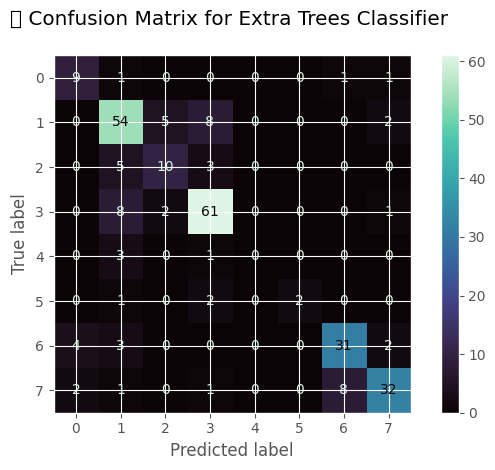

In [83]:
from sklearn import metrics
class_names = power_plant.columns
metrics.plot_confusion_matrix(Final_mod, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

#### Saving Model

In [84]:
import joblib
joblib.dump(Final_mod,'powerplant_ExtraTREE_Classification_Final.pkl')

['powerplant_ExtraTREE_Classification_Final.pkl']

# Building the Machine Learning Models for Regression Methods

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

#### Before continuing doing the feature engineering

In [86]:
#Let's Make a copy of the entire dataset and go for building the Regression Analysis
power_plant2=power_plant.copy()

In [87]:
#Let's perform Inter Quantile Ratios for Statistical Analysis
power_plant3=power_plant2.copy()
Q1 = power_plant3.quantile(0)
Q3= power_plant3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2013           NaN
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
generation_gwh_2019           NaN
Power_plant_age          39.00000
dtype: float64


In [88]:
reg_analysis = power_plant3[~((power_plant3 < (Q1 - 1.5 * IQR)) |(power_plant3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(reg_analysis.shape)

(877, 13)


In [89]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
reg_analysis[skew] = scaler.fit_transform(reg_analysis[skew].values)
reg_analysis[skew].head()

,longitude,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,NaN,-0.115824,0.109529,0.134579,-0.043225,-0.178934
4,1.147361,-2.024155,NaN,0.916782,1.451544,1.495059,1.348860,-1.370997


In [90]:
# We will drop other fuel as result of poor correlation and lot of missing values
reg_analysis.drop("other_fuel1",axis=1,inplace=True)
# Missing Value Imputation of latitude with mean
reg_analysis['Power_plant_age'] = reg_analysis['Power_plant_age'].fillna(reg_analysis['Power_plant_age'].mean())

In [91]:
reg_analysis.drop("generation_gwh_2013",axis=1,inplace=True)
reg_analysis.drop("generation_gwh_2014",axis=1,inplace=True)
reg_analysis.drop("generation_gwh_2015",axis=1,inplace=True)
reg_analysis.drop("generation_gwh_2016",axis=1,inplace=True)
reg_analysis.drop("generation_gwh_2017",axis=1,inplace=True)

In [92]:
reg_analysis.drop("generation_gwh_2018",axis=1,inplace=True)
reg_analysis.drop("generation_gwh_2019",axis=1,inplace=True)

## Standard Scaling

In [93]:
# Splitting data in target and dependent feature
X = reg_analysis.drop(['capacity_mw'], axis =1)
Y = reg_analysis['capacity_mw']

In [94]:
X

,latitude,longitude,primary_fuel,Power_plant_age
0,28.1839,-0.933334,6,-8.032651e-01
1,24.7663,-0.516718,1,3.210283e-16
2,21.9038,-2.413165,7,3.210283e-16
3,23.8712,2.166057,2,-1.789344e-01
4,21.9603,1.147361,1,-1.370997e+00
...,...,...,...,...
902,16.2949,0.190109,1,-1.574886e+00
903,12.8932,0.369881,6,3.210283e-16
904,15.2758,-0.248308,7,3.210283e-16
905,24.3500,-0.773353,1,3.210283e-16


In [95]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (587, 4)
Training target vector size: (587,)
Test feature matrix size: (290, 4)
Test target vector size: (290,)


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.32142351199370456 on Random_state 66


### Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=91, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [ 8.96267957e+01  1.14217617e+00  3.57360468e+02  6.10323774e+02
  8.82090261e+01  3.41867292e+02  2.79943353e-01  6.03620820e+02
  7.06270454e+01  3.43809233e+02  4.12210557e+02  1.86236208e+02
  4.51119528e+02  5.92415895e+02  4.07595486e+02  1.84291953e+01
  4.37119258e+02  4.17669858e+02  1.35277613e+02  3.61669502e+00
  2.12481810e+02  2.22686881e+02  7.00029948e+01  7.01358663e+01
  2.71708626e+02  5.14724101e+01  3.55468501e+01  2.63776527e+02
  3.24221185e+02  4.69618801e+02  5.14574258e+01  6.09169066e+02
  3.62041388e+02  1.10294468e+02  1.47126198e+02  3.09804422e+02
  4.02589629e+02  4.00424214e+02  5.41381589e+02  5.37924562e+02
  1.10900965e+01  1.97597922e+02  1.84920533e+02  4.48842163e+02
  2.48149462e+02  3.45494206e+02  5.48584546e+01  6.31237472e+00
  4.08274205e+02  1.29253938e+00  3.37164392e+02  1.20083264e+02
  1.44989440e+02  3.75070867e+02  6.79394069e+02  2.70559179e+02
  5.55398489e+02 -6.76222451e+01  6.17589171e+01  3.18621136e+02
  7.1274

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 231.9001421367643
Mean squared error : 121621.09104031282
Root Mean Squared Error: 348.74215552512834


 R2 Score :
0.2118236454003275


### Applying other ML Models

In [100]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 163.4173445624836
Mean squared error : 82386.49397208517
Root Mean Squared Error: 287.0304756852226


 R2 Score :
0.466086959657002


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 231.89963356419463
Mean squared error : 121620.98598474874
Root Mean Squared Error: 348.7420049044117


 R2 Score :
0.21182432622230352


 Error of  DecisionTreeRegressor() :
Mean absolute error : 193.4878103146853
Mean squared error : 117744.60951246694
Root Mean Squared Error: 343.1393441627861


 R2 Score :
0.23694553053682743


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 185.06317720676424
Mean squared error : 83835.80302742051
Root Mean Squared Error: 289.5441296718352


 R2 Score :
0.4566945827415222


 Error of  GradientBoostingRegressor() :
Mean absolute error : 170.42871512254638
Mean squared error : 82911.45735175304
Root Mean Squared Error: 287.9434968040658


 R2 Score :
0.4626848875382129


 Error of  

In [101]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.5143360931281827


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.22748377028159927


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.1913755789291633


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.4671351807450629


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.49196348316524824


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_

#### Among all Model Random Forest Regressor gave us maximum R2 score  and minimum  RMSE value  . So We will perform Hyper Parameter Tuning on Random Forest Regressor.

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['mse','mae'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [104]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose = 5)

In [ ]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.601 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.559 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.565 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.492 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.545 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.555 total time=   0.2s
[CV 2/5] END criterion=mse, ma

[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.552 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.572 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.558 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.509 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.474 total time=   0.2s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.565 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_sa

[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.449 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.580 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.564 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.570 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.496 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.485 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, 

[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.434 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.441 total time=   0.2s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.588 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.558 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.532 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.447 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, 

[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.512 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.498 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.452 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.539 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.557 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.513 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.465 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.473 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.486 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.514 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.551 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.469 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, 

[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.502 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.443 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.386 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.432 total time=   0.2s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.512 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.531 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, 

[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.592 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.502 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.514 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.460 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.547 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.592 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_sam

[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.528 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.542 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.463 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.453 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.457 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.519 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, m

[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.423 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.508 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.529 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.447 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.400 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.430 total time=   0.2s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_sa

[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.541 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.491 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.539 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.563 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.580 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.561 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_s

[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.567 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.495 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.460 total time=   0.2s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.564 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.571 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.567 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_sa

[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.584 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.558 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.499 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.476 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.595 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.570 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, 

[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.595 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.576 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.533 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.441 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.467 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.580 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, 

[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.458 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.533 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.570 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.503 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.489 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.480 total time=   0.2s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.447 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.511 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.535 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.496 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.456 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.436 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, 

[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.426 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.430 total time=   0.2s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.497 total time=   0.2s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.516 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.464 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.409 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, 

In [ ]:
GCV.best_params_

## Final Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=50 ,criterion = 'mse', max_depth= 40, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')

In [ ]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Final Regression Saving Model

In [ ]:
import joblib
joblib.dump(Final_mod,'Powerplant_RandomForest_regression_Final.pkl')